<a href="https://colab.research.google.com/github/mmazurek-wat/nlp-edu/blob/main/SVD_and_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resources


scikit truncated SVD
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

Resolving the Sign ambiguity in the SVD
https://www.osti.gov/servlets/purl/920802

Taming Text with SVD
https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.395.4666&rep=rep1&type=pdf

SVD
https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

PCA
https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

Computational Statistics in Python
https://people.duke.edu/~ccc14/sta-663/PCASolutions.html

Truly Understanding SVD - The Intuitive Core Idea
https://towardsdatascience.com/svd-8c2f72e264f

Understanding the Covariance Matrix
https://janakiev.com/blog/covariance-matrix/

# Util functions

In [77]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces


import numpy as np
from sklearn.decomposition import TruncatedSVD


%matplotlib inline

In [78]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.patches.Ellipse

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [79]:
def plot_transformation_with_eigenvectors(A):

  # Creating the vectors for a circle and storing them in x
  xi1 = np.linspace(-1.0, 1.0, 100)
  xi2 = np.linspace(1.0, -1.0, 100)
  yi1 = np.sqrt(1 - xi1**2)
  yi2 = -np.sqrt(1 - xi2**2)

  xi = np.concatenate((xi1, xi2),axis=0)
  yi = np.concatenate((yi1, yi2),axis=0)

  x = np.vstack((xi, yi))

  origin = [0,0],[0,0]  # origin point



  lam, u = LA.eig(A)

  t = A @ x   # Vectors in t are the transformed vectors of x
  u_new = A @ u

  print("u_new=",np.round(u_new, 4), )

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

  plt.subplots_adjust(wspace=0.4)

  # Plotting x
  ax1.plot(x[0,:], x[1,:], color='b')
  ax1.quiver(*origin, u[0,:], u[1,:], color=['g'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax1.set_xlabel('x', fontsize=14)
  ax1.set_ylabel('y', fontsize=14)
  ax1.set_xlim([-4,4])
  ax1.set_ylim([-4,4])
  ax1.set_aspect('equal')

  ax1.grid(True)
  ax1.set_title("Original vectors")
  ax1.axhline(y=0, color='k')
  ax1.axvline(x=0, color='k')
  ax1.text(u[0,0]*1.1, u[1,0]*1.1,  "$\mathbf{u_1}$", fontsize=14)
  ax1.text(u[0,1]*1.1, u[1,1]*1.1, "$\mathbf{u_2}$", fontsize=14)
  ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

  # Plotting t
  ax2.plot(t[0, :], t[1, :], color='b')
  ax2.quiver(*origin, u_new[0,:], u_new[1,:], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax2.quiver(*origin, u_new[0,:], u_new[1,:], color=['g'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax2.set_xlabel('x', fontsize=14)
  ax2.set_ylabel('y', fontsize=14)
  ax2.set_xlim([-4,4])
  ax2.set_ylim([-4,4])
  ax2.set_aspect('equal')
  ax2.grid(True)
  ax2.set_title("New vectors after transformation with eigenvectors of A")
  ax2.axhline(y=0, color='k')
  ax2.axvline(x=0, color='k')

  ax2.text( u_new[0,0]*1.1, u_new[1,0]*1.1, "$\mathbf{v_1}$", fontsize=14)
  ax2.text(u_new[0,1]*1.1, u_new[1,1]*1.1, "$\mathbf{v_2}$", fontsize=14)

  ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

  plt.show()







In [80]:
def generate_random(N):

  n = 2

  Sigma = [[1,0],[0,1]]
  mu=[0,0]

  distribution = multivariate_normal(mean=mu, cov=Sigma)
  samples = distribution.rvs(N)

  ### !!!!

  #To have observations in columns, we have to transpose
  # originally variables in columns, observations in rows: let's rotate for column vectors:
  return samples.T


In [81]:
def plot_dataset_with_corr_eigenvalues(sample_var_in_rows):

  fig, ax = plt.subplots(figsize=(6, 6))

  X = sample_var_in_rows

  plt.axis("equal")
  plt.axhline(y=0, color='k')
  plt.axvline(x=0, color='k')
  plt.scatter(X[0], X[1])


  cov = np.cov(X)
  lambd, u = eig(cov)

  sqrt_lambd = np.sqrt(lambd)
  l1 = u[:,0] *  sqrt_lambd[0]

  ax.quiver([0],[0], l1[0], l1[1] , color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

  l2 = u[:,1] * sqrt_lambd[1]
  ax.quiver([0],[0], l2[0], l2[1] , color=['y'], width=0.012, angles='xy', scale_units='xy', scale=1)

  confidence_ellipse(X[0], X[1], ax, 1,  edgecolor='red')

  confidence_ellipse(X[0], X[1], ax, 3, edgecolor='red')

  plt.show()

In [82]:
def plot_dataset_with_corr_eigenvalues2(original_sample, transformed_sample=plt.NullFormatter):


  fig, exes= plt.subplots(1,2,figsize=(12, 6), sharex= True, sharey=True)


  lowest = np.minimum(np.min(original_sample), np.min(transformed_sample))
  upper = np.maximum(np.max(original_sample), np.max(transformed_sample))

  range = np.maximum(abs(lowest), abs(upper))


  wbound =  - range
  ebound = range
  sbound = - range
  nbound = range

  plt.xlim(wbound, ebound)
  plt.ylim(sbound, nbound)

  for (ax, X) in zip(exes, [original_sample,transformed_sample ]) :


    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_aspect('equal')
    ax.scatter(X[0], X[1])


    cov = np.cov(X)
    lambd, u = eig(cov)

    sqrt_lambd = np.sqrt(lambd)
    l1 = u[:,0] *  sqrt_lambd[0]

    ax.quiver([0],[0], l1[0], l1[1] , color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

    l2 = u[:,1] * sqrt_lambd[1]
    ax.quiver([0],[0], l2[0], l2[1] , color=['y'], width=0.012, angles='xy', scale_units='xy', scale=1)

    confidence_ellipse(X[0], X[1], ax, 1,  edgecolor='red')
    confidence_ellipse(X[0], X[1], ax, 3, edgecolor='red')

  plt.show()

# Covariance matrix

he diagonal entries of the covariance matrix are the variances and the other entries are the covariances. For this reason the covariance matrix is sometimes called the variance-covariance matrix.

The covariance σ(x,y)
 of two random variables x
 and y
 is given by

σ(x,y)=1n−1∑i=1n(xi−x¯)(yi−y¯)



$\sigma(x, y) = \frac{1}{n-1} \sum^{n}_{i=1}{(x_i-\bar{x})(y_i-\bar{y})}$


$C = \frac{1}{n-1} \sum^{n}_{i=1}{(X_i-\bar{X})(X_i-\bar{X})^T}$

$d$ - number of dimensions

$C \in \mathbb{R}^{d \times d} $

$X \in \mathbb{R}^{n \times d} $


Centered variables  (zero mean):

$C = \frac{XX^T}{n-1}$ by using the semi-definite matrix  $ XX^T$

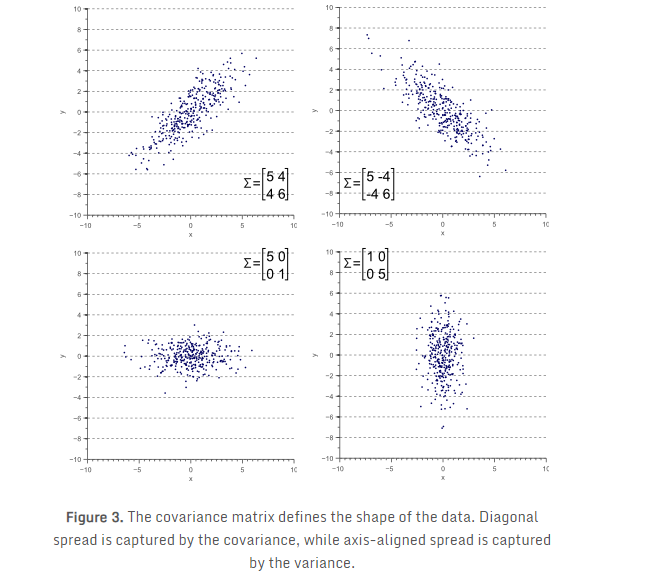

# Transformacja wektorów w przestrzeni liniowej

Każda macierz definiuje transformację wektora: rotację i rozciąganie.

In [83]:
import numpy as np
#Baza B=[[1,0],[0,1]]
#Przykładowy wektor u

# Macierz A
A = np.array([[1,1],[3,2]])

print( A)

# Przykładowy wektor
u=[-1,3]
v=A@u

print(v)

[[1 1]
 [3 2]]
[2 3]


Original dataset  multivariate normal (0,1)



Random points with mean values x¯, y¯  at the origin and unit variance σ2x=σ2y=1   which is also called ***white noise*** and has the identity matrix as the covariance matrix.





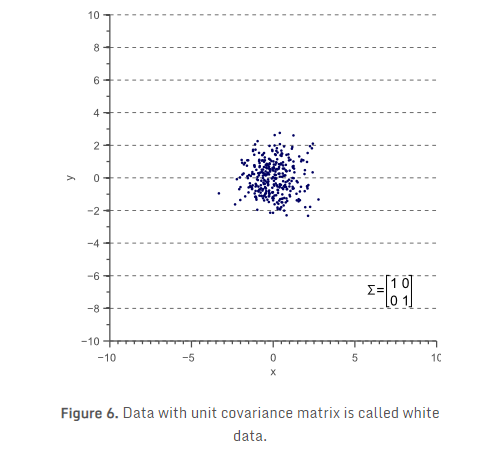

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal,chi2
from scipy.linalg import sqrtm, inv

n = 1000
X = generate_random(n)




print(np.mean(X , axis = 1))
print('variables in rows, observations in columns')
print(X .shape)

print("covariance: ")
print(np.cov(X )) # rowvar = True

print("covariance once again, this time: ")

#Another way
C = X @ X.T
C = C / (n-1)
print (C)






[-0.02  0.03]
variables in rows, observations in columns
(2, 1000)
covariance: 
[[0.99 0.04]
 [0.04 0.9 ]]
covariance once again, this time: 
[[0.99 0.04]
 [0.04 0.9 ]]


## Eigen values

Wynikiem mnożenia $Ax$ jest transformacja wektora: jego obrót oraz przeskalowanie. Istnieją takie wektory, w których zmienia się jedynie norma wektora (długość), a nie zmienia się kierunek: macierz $A$ "rozciąga" wektor w oryginalnym kierunku.

Aby osiągnąć efekt "rozciągnięcia" wektora bez zmiany kierunku, należy go przemnożyć przez skalar.

Dla wektora
$\mathbf{u}$ ,
wartośći $\lambda$,

$\lambda \mathbf{u}$

Dla transformacji  określonej macierzą $A$ istnieją takie wektory jak $x_2$, że zachodzi:

$t_2= Ax_2=\lambda x_2$

Takie wektory nazywamy wektorami własnymi (*eigenvectors*), a odpowiadające wartości $\lambda$ wartościami własnymi (*eigenvalues*).

**Wartości własne macierzy**

$Av = \lambda v$

lub

$(A- \lambda I)v = 0$


Skalar $\lambda$ nazywamy wartością własną macierzy A jeżeli  istnieje niezerowy wektor $v$, taki że:

$Av = \lambda v$

Wektor $v$ nazywamy wektorem własnym odpowiadającym wartości własnej $\lambda$


Następujące warunki są równoważne:

(a) $\lambda$ jest wartością własną macierzy A

(b) układ równań $(A-\lambda I)v=0$ ma niezerowe rozwiązanie

(c) $det(A-\lambda I)=0$



In [85]:

from numpy.linalg import eig

# axes are eigenvectors



# eigenvectors: The normalized (unit “length”) eigenvectors, such that
# the column eigenvectors[:,i] is the eigenvector corresponding to the eigenvalue eigenvalues[i].
cov  = np.cov(X)
lambd, u = eig(cov)
print("u: (column vector)")
print(u)
print("lambda:")
print(lambd)

print("pairs")
print("u1: {0} and the corresponding lambda {1}".format(u[:,0], lambd[0]))
print("u2: {0} and the corresponding lambda {1}".format(u[:,1], lambd[1]))




u: (column vector)
[[ 0.94 -0.35]
 [ 0.35  0.94]]
lambda:
[1.01 0.89]
pairs
u1: [0.94 0.35] and the corresponding lambda 1.0069068271251822
u2: [-0.35  0.94] and the corresponding lambda 0.8882132601892256


Eclipse - one standard deviation from the mean - equal to square root of eigenvalues.

In [86]:
print(u)
print(inv(u))

[[ 0.94 -0.35]
 [ 0.35  0.94]]
[[ 0.94  0.35]
 [-0.35  0.94]]


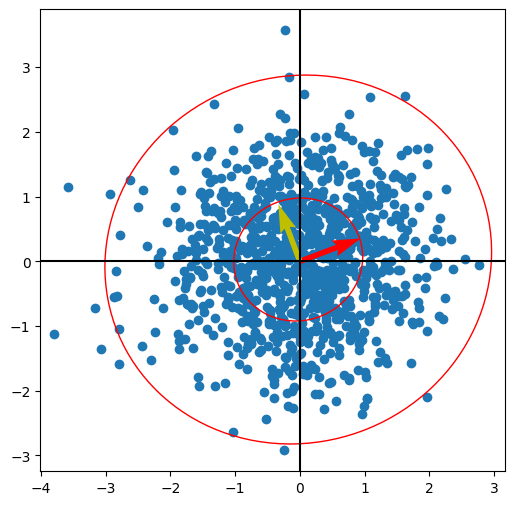

In [87]:
plot_dataset_with_corr_eigenvalues(X)

Define transformation

$Y = A X $

## Rotation

$
R = \left(
\begin{array}{ccc}
cos(\theta) \ -sin(\theta) \\
sin(\theta) \  cos(\theta)  
\end{array}
\right)
$

$Y = A \cdot X = R ̧\cdot S \cdot  X $

$ S  =  \sqrt{C}$ (no  covariance)


Rotation angle $θ $  counterclockwise

In [88]:
theta_degrees = 30

theta = theta_degrees * 2.0 * np.pi / 360.0
np.sin(theta)

A = [ [np.cos(theta),  -np.sin(theta)],
      [np.sin(theta),  np.cos(theta) ] ]



In [89]:

Y  = A@X
print(X.shape)

print("Covariance matrix of transformed data:")
cov  = np.cov(Y)
print(cov)

# axes are eigenvectors
lambd, u = eig(cov)
print("u:")
print(u)
print("lambda:")
print(lambd)

(2, 1000)
Covariance matrix of transformed data:
[[0.94 0.06]
 [0.06 0.96]]
u:
[[-0.77 -0.63]
 [ 0.63 -0.77]]
lambda:
[0.89 1.01]


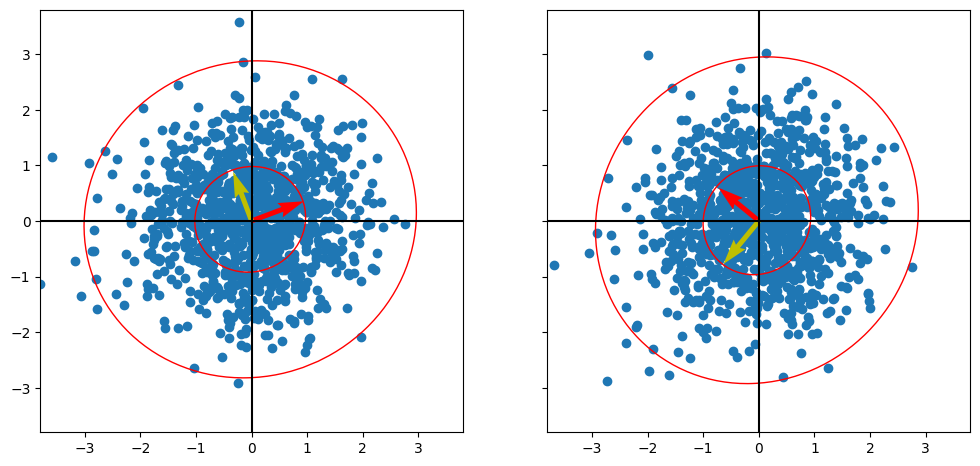

In [90]:
plot_dataset_with_corr_eigenvalues2(X, Y)

## Stretch

In [91]:
A = [ [2,0],
      [0,3] ]

In [92]:

Y  = A@X
print(X.shape)

print("Covariance matrix of transformed data:")
cov  = np.cov(Y)
print(cov)

# axes are eigenvectors
lambd, u = eig(cov)
print("u:")
print(u)
print("lambda:")
print(lambd)

(2, 1000)
Covariance matrix of transformed data:
[[3.97 0.23]
 [0.23 8.13]]
u:
[[-1.   -0.06]
 [ 0.06 -1.  ]]
lambda:
[3.96 8.14]


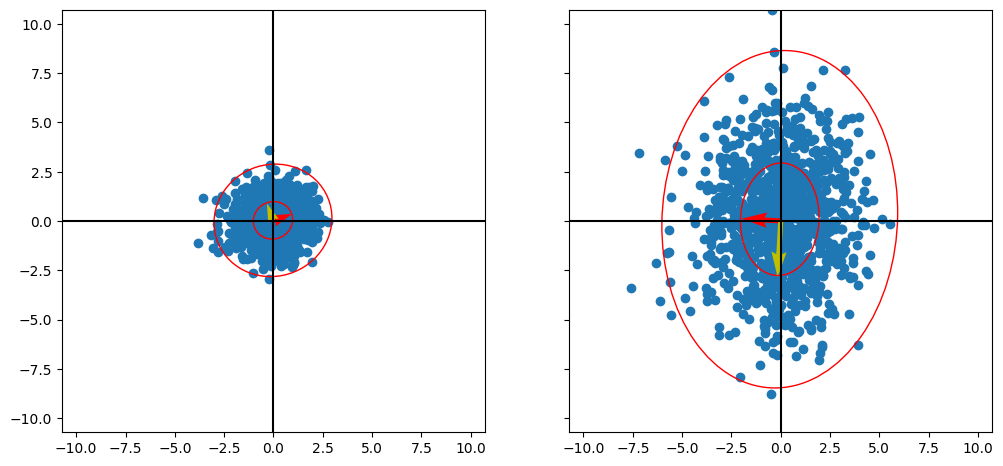

In [93]:
plot_dataset_with_corr_eigenvalues2(X, Y)

## Rotation and stretch

In [94]:
A = [ [2,1],
      [0,3] ]


Y  = A@X
print(X.shape)

print("Covariance matrix of transformed data:")
cov_Y  = np.cov(Y)
print(cov_Y)

# axes are eigenvectors
lambd, u = eig(cov_Y)
print("u:")
print(u)
print("lambda:")
print(lambd)



(2, 1000)
Covariance matrix of transformed data:
[[5.03 2.94]
 [2.94 8.13]]
u:
[[-0.86 -0.52]
 [ 0.52 -0.86]]
lambda:
[3.25 9.9 ]


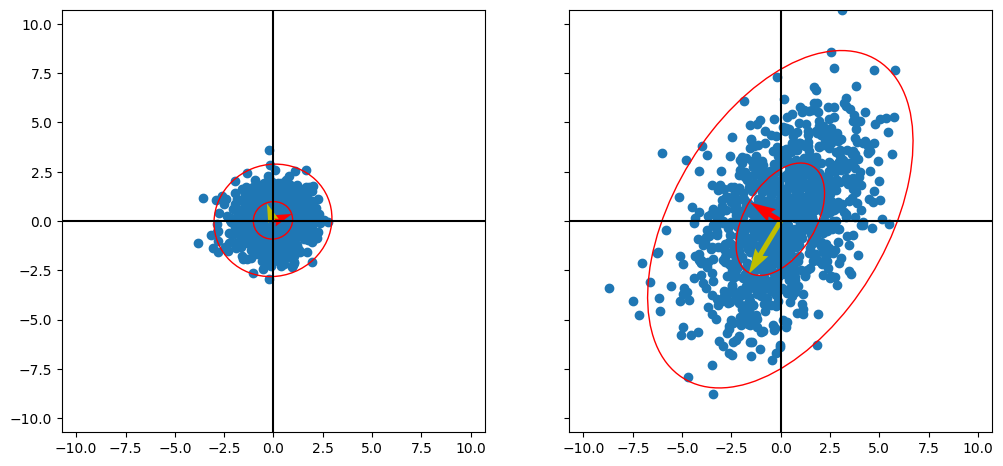

In [95]:
plot_dataset_with_corr_eigenvalues2(X, Y)

### Decomposition of covariance matrix



In order to calculate the linear transformation of the covariance matrix one must calculate the eigenvectors and eigenvectors from the covariance matrix $C$. This can be done by calculating

$ A = V \sqrt{\Lambda} $

where V
 is the previous matrix where the columns are the eigenvectors of $C$
 and $S$  is the previous diagonal matrix consisting of the corresponding eigenvalues.


Transformation:

$ Y = A \cdot X $


is a rotation and strech:

$ A = R \cdot S$

$ Y = R \cdot S \cdot X$



$ cov(Y) = Y Y^T = A \cdot  X  \cdot (A \cdot  X)^T  $

$ cov(Y) = A \cdot  X  \cdot X^T  \cdot  A  $

$ cov(Y) = A  \cdot  A ^T  $

Covariance matrix is symmetrical so decomposition looks like:

$ A A^T = V \Lambda V^T $

$  R \cdot S \cdot  (R \cdot S)^T = V \Lambda V^T  $

$  R \cdot S \cdot  S^T \cdot R^T = V \Lambda V^T  $

Diagonal matrix S:

$ S \cdot  S^T = S^2 $

Thus:

$  R \cdot   S^2 \cdot R^T = V \Lambda V^T  $


$ R = V $

$ S = \sqrt{Λ} $

In [96]:
# Matrix A from previuos cell
# A = [ [2,1],
#       [0,3]

from numpy.linalg import svd
V, S, Vt  = svd(cov_Y)

print("SVD Decomposition of correlation matrix")
print("\n V:")
print(V)

print("\n S:         #the same as eigenvalues of correlation matrix")
print(S)

print("\n Vt:")
print(Vt)

print("\n Check: it should be the same")
print(V@np.diag(S)@Vt)
print(cov_Y)


## Rotation from matrix V - because of sign ambiguity, it might happen   signs are switched.

print("\n Let's switch signs in second column of V na Vt accordingly")
V[:,1] = -V[:,1]
Vt = V.T

print("V: ")
print(V)

print("\n Check: it should be the same")
print(V@np.diag(S)@Vt)



print("\n R:         # Rotation is V ")
R =  V
print(V)

theta = np.arccos(V[0,0])
print("Theta: {0}".format(np.rad2deg(theta)))

theta = np.arccos(V[1,1])
print("Theta: {0}".format(np.rad2deg(theta)))

# minus
theta = np.arcsin(-V[0,1])
print("Theta: {0}".format(np.rad2deg(theta)))

theta = np.arcsin(V[1,0])
print("Theta: {0}".format(np.rad2deg(theta)))


print("\n S:         # Stretch is squared lambda")

S1 = np.diag(np.sqrt(S))
print(S1)


SVD Decomposition of correlation matrix

 V:
[[-0.52 -0.86]
 [-0.86  0.52]]

 S:         #the same as eigenvalues of correlation matrix
[9.9  3.25]

 Vt:
[[-0.52 -0.86]
 [-0.86  0.52]]

 Check: it should be the same
[[5.03 2.94]
 [2.94 8.13]]
[[5.03 2.94]
 [2.94 8.13]]

 Let's switch signs in second column of V na Vt accordingly
V: 
[[-0.52  0.86]
 [-0.86 -0.52]]

 Check: it should be the same
[[5.03 2.94]
 [2.94 8.13]]

 R:         # Rotation is V 
[[-0.52  0.86]
 [-0.86 -0.52]]
Theta: 121.12136459649737
Theta: 121.12136459649737
Theta: -58.87863540350259
Theta: -58.87863540350261

 S:         # Stretch is squared lambda
[[3.15 0.  ]
 [0.   1.8 ]]


## Funkcja do wizualizacji

In [97]:
A = np.array([[3, 1],
              [2, 1]])
print(np.linalg.det(A))
lam, vect  = np.linalg.eig(A)
print(lam)
print(vect)

print(np.identity(2))


v1 = vect[:,0]
print(v1)

print(lam[0]*np.outer(v1, v1.T))


v1 = vect[1,:]
print(v1)

print()
print("Iloczyn")
print(lam[0]*np.outer(v1, v1.T))


print("****")
print(A@vect@inv(vect))
print((lam*vect)@inv(vect))

print("****")
print(vect@inv(vect))

print("****")
print(lam*vect)
print((lam*vect)@inv(vect))


1.0000000000000002
[3.73 0.27]
[[ 0.81 -0.34]
 [ 0.59  0.94]]
[[1. 0.]
 [0. 1.]]
[0.81 0.59]
[[2.43 1.78]
 [1.78 1.3 ]]
[0.59 0.94]

Iloczyn
[[1.3  2.07]
 [2.07 3.29]]
****
[[3. 1.]
 [2. 1.]]
[[3. 1.]
 [2. 1.]]
****
[[1. 0.]
 [0. 1.]]
****
[[ 3.01 -0.09]
 [ 2.2   0.25]]
[[3. 1.]
 [2. 1.]]


transformation matrix - sqrtm 
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]
[1. 1.]
[[1. 0.]
 [0. 1.]]
scale_matrix
[[1. 0.]
 [0. 1.]]
rotation_matrix
[[1. 0.]
 [0. 1.]]
det:  1.0
Corresponding A: 
[[1. 0.]
 [0. 1.]]
ciricle shape (2, 100)
Number of points inside:  93
Number of points outside: 7


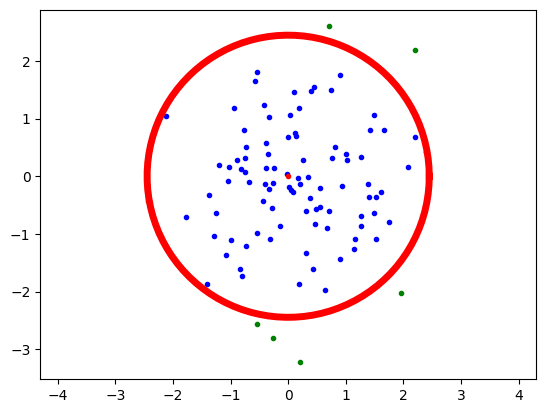

In [98]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal,chi2
from scipy.linalg import sqrtm, inv
np.random.seed(123)
N = 100
n = 2
X = np.random.randn(n, n)
Sigma = (1/n) * X.T @ X   # random covariance matrix

Sigma = [[1,0],[0,1]]
#mu  = np.zeros(n)
mu=[0,0]
distribution = multivariate_normal(mean=mu, cov=Sigma)
samples = distribution.rvs(N)


print("transformation matrix - sqrtm ")
print(sqrtm(Sigma))


# A transformation matrix from covariance
V, L, VT = np.linalg.svd(Sigma)
print(V)
print(L)
print(VT) ## vh = U.T

print("scale_matrix")
scale_matrix = np.zeros([2,2])
np.fill_diagonal(scale_matrix, np.sqrt(L))
print(scale_matrix)
print("rotation_matrix")
rotation_matrix = V
print(rotation_matrix)
print("det: ", np.linalg.det(rotation_matrix))

#change sign of column if rotation matrix determiner  = -1
if np.linalg.det(rotation_matrix) < 0:
  V[:,0] = V[:,0]*(-1)

print("Corresponding A: ")
A = V@scale_matrix
print(A)


# confidence region is given by x.T S^{-1} x <= chi^2(p)
confidence = 0.95
r = np.sqrt( chi2.isf(1-confidence, df=n) )
T = np.linspace(0, 2*np.pi, num=100)
circle = r * np.vstack([np.cos(T), np.sin(T)])
print('ciricle shape' , circle.shape)
x, y = sqrtm(Sigma) @ circle   # ten krok jest  niejasny
#x, y = A @ circle   # ten krok jest  niejasny
x = x + mu[0]
y = y + mu[1]

circle  = np.vstack([x,y])

samples_centered = samples - mu
u, v = inv(sqrtm(Sigma)) @ samples_centered.T
inside = (u)**2 + (v)**2 <= r**2
print("Number of points inside: ",  np.sum(inside))
outside = ~inside
print("Number of points outside:",  np.sum(outside))
plt.axis('equal')
plt.plot(*samples[inside].T, '.b');
plt.plot(*samples[outside].T, '.g');
plt.plot(*circle, '-r', linewidth=5)
plt.plot(*mu,'.r')
plt.show()


### Przykład

In [99]:
A = np.array([[3, 1],
              [2, 1]])
L, V = np.linalg.eig(A)
print(V)
print(L)


#wektory własne w kolumnach!

print(V[0,0]**2 + V[1,0]**2)
print(V[0,1]**2 + V[1,1]**2)


[[ 0.81 -0.34]
 [ 0.59  0.94]]
[3.73 0.27]
0.9999999999999999
1.0


In [100]:
# Transformation matrix covariance

L, V = np.linalg.eig(A@A.T)
print("Eigen values: ", L)
print("Eigen vectors: ")
print(V)
print("Scaling matrix:")
S = np.eye(2)*np.sqrt(L) #place V on diagonal
print(S)
print("Rotation matrix:")
print(V)

# check
print(V.shape)
print(S.shape)
print(V@S)

x = [0,1]
print(V.T@S)

print(V[0,0]**2 + V[0,1]**2)
print(V[1,0]**2 + V[1,1]**2)

print(V[0,0]**2 + V[1,0]**2)
print(V[0,1]**2 + V[1,1]**2)

Eigen values:  [14.93  0.07]
Eigen vectors: 
[[ 0.82 -0.58]
 [ 0.58  0.82]]
Scaling matrix:
[[3.86 0.  ]
 [0.   0.26]]
Rotation matrix:
[[ 0.82 -0.58]
 [ 0.58  0.82]]
(2, 2)
(2, 2)
[[ 3.16 -0.15]
 [ 2.23  0.21]]
[[ 3.16  0.15]
 [-2.23  0.21]]
1.0
1.0
1.0
1.0


In [101]:
print(np.arccos(V[0,0])*180/np.pi)
print(np.arcsin(V[1,0])*180/np.pi)

35.17308797097335
35.17308797097335


### Macierze symetryczne

**Macierz symetryczna**

Symetryczna macierz przekształca wektor poprzez przeskalowanie go w kierunku swoich wektorów własnych.

Wektory własne są położone na kierunkach osi elipsy.

u_new= [[ 2.18  0.51]
 [ 0.51 -2.18]]


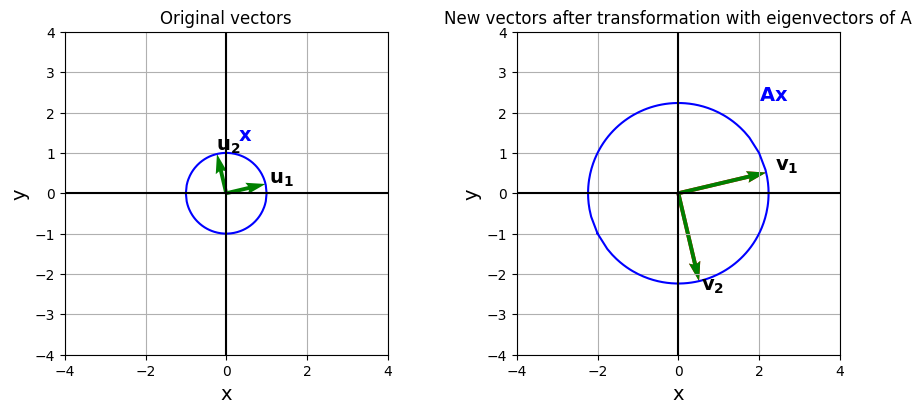

u_new= [[ 3.6  -0.27]
 [ 2.81  0.35]]


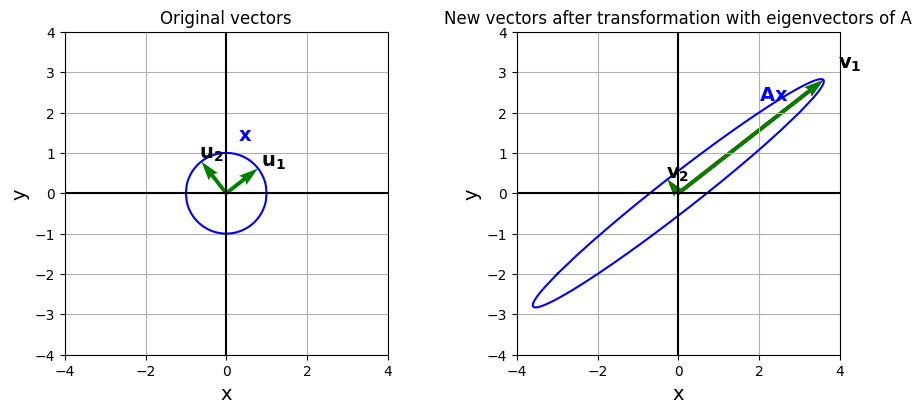

In [102]:

A = np.array([[2, 1],
              [1, -2]])

plot_transformation_with_eigenvectors(A)


A = np.array([[3, 2],
              [2, 2]])

plot_transformation_with_eigenvectors(A)

## Wizualizacja transformacji


### Funkcja do wizualizacji transformacji wektorów

In [103]:

def plot_transformation(A, sample_indexes=[65,100]):

  # Creating the vectors for a circle and storing them in x
  xi1 = np.linspace(-1.0, 1.0, 100)
  xi2 = np.linspace(1.0, -1.0, 100)
  yi1 = np.sqrt(1 - xi1**2)
  yi2 = -np.sqrt(1 - xi2**2)

  xi = np.concatenate((xi1, xi2),axis=0)
  yi = np.concatenate((yi1, yi2),axis=0)
  x = np.vstack((xi, yi))

  # getting a sample vector from x
  x_sample1 = x[:, sample_indexes[0]]
  x_sample2 = x[:, sample_indexes[1]]



  t = A @ x  # Vectors in t are the transformed vectors of x

  t_sample1 = t[:, sample_indexes[0]]
  t_sample2 = t[:, sample_indexes[1]]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

  plt.subplots_adjust(wspace=0.4)

  # Plotting x
  ax1.plot(x[0,:], x[1,:], color='b')
  ax1.quiver( x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax1.quiver( x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax1.set_xlabel('x', fontsize=14)
  ax1.set_ylabel('y', fontsize=14)
  ax1.set_xlim([-4,4])
  ax1.set_ylim([-4,4])
  ax1.set_aspect('equal')
  ax1.grid(True)
  ax1.set_axisbelow(True)
  ax1.set_title("Original vectors")
  ax1.axhline(y=0, color='k')
  ax1.axvline(x=0, color='k')
  ax1.text(x_sample1[0], x_sample1[1], "$\mathbf{x_1}$", color='b', fontsize=14)
  ax1.text(x_sample2[0], x_sample2[1], "$\mathbf{x_2}$", color='r', fontsize=14)

  # Plotting t
  ax2.plot(t[0, :], t[1, :], color='b')
  ax2.quiver( t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
  ax2.quiver( t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

  ax2.set_xlabel('x', fontsize=14)
  ax2.set_ylabel('y', fontsize=14)
  ax2.set_xlim([-4,4])
  ax2.set_ylim([-4,4])
  ax2.set_aspect('equal')
  ax2.grid(True)
  ax2.set_axisbelow(True)
  ax2.set_title("New vectors after transformation")
  ax2.axhline(y=0, color='k')
  ax2.axvline(x=0, color='k')
  ax2.text(t_sample1[0]*1.1, t_sample1[1]*1.1, "$\mathbf{t_1}$", color='b', fontsize=14)
  ax2.text(t_sample2[0]*1.1, t_sample2[1]*1.1, "$\mathbf{t_2}$", color='r', fontsize=14)
  plt.savefig('2.png', dpi=300, bbox_inches='tight')

  plt.show()



### Przykład

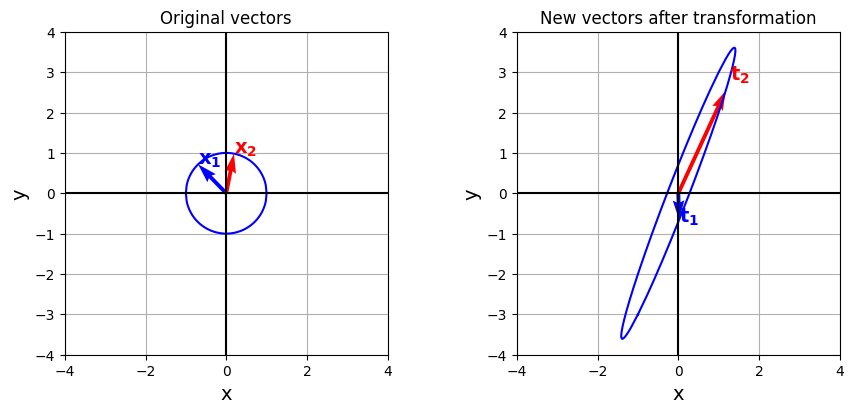

In [104]:

import random

A = np.array([[1,1],
              [3, 2]])

plot_transformation(A, sample_indexes=[random.randint(0,100),random.randint(0,100)])

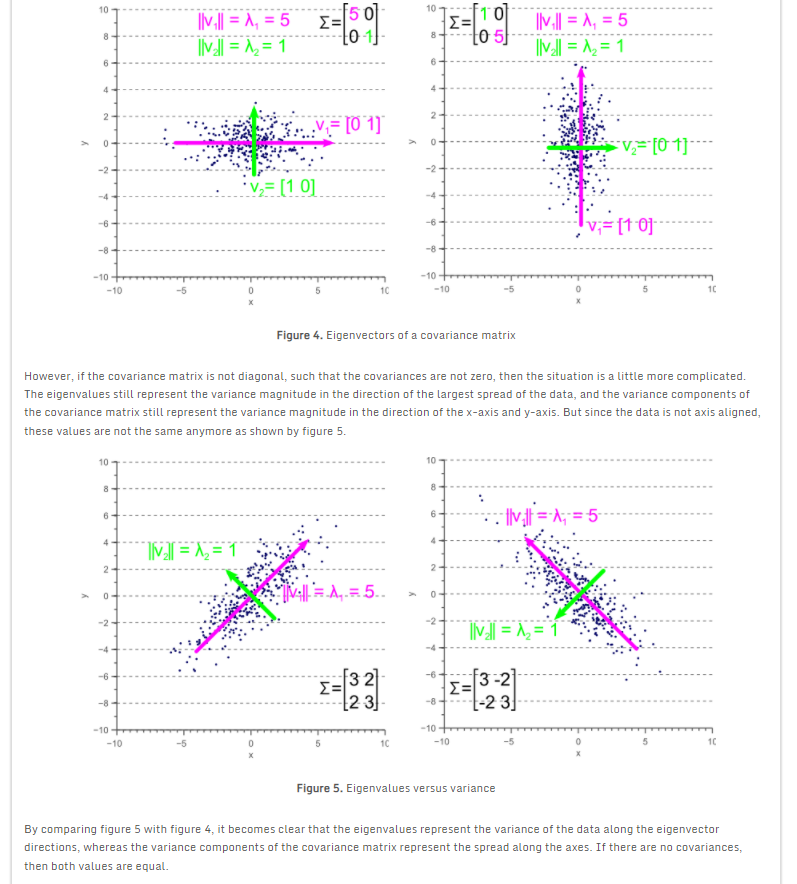

TO DO: wyjaśnić dekompozycje


In [105]:
C = np.array([[5,0], [0,1]])
V, L, VT = np.linalg.svd(C)
if np.linalg.det(V) < 0:
  V[:,0] = V[:,0]*(-1)

print("Eigen vectors/ rotation matrix")
print(V)
print("Eigen values")
print(L)


S = np.zeros([2,2])
np.fill_diagonal(S, L)
A = V@S
print("Matrix A:")
print(A)

print(np.sqrt(A@A.T))

def decompose_cov(cov_matrix):
  V, L, VT = np.linalg.svd(cov_matrix)
  if np.linalg.det(V) < 0:
    V[:,0] = V[:,0]*(-1)

  print("Eigen vectors/ rotation matrix")
  print(V)
  print("Eigen values")
  print(L)


  S = np.zeros([2,2])
  np.fill_diagonal(S, L)
  A = V@S

  return A



Eigen vectors/ rotation matrix
[[1. 0.]
 [0. 1.]]
Eigen values
[5. 1.]
Matrix A:
[[5. 0.]
 [0. 1.]]
[[5. 0.]
 [0. 1.]]


In [106]:
C = np.array([[3,2], [2,3]])
A = decompose_cov(C)
print("Matrix A")
print(A)

print(np.sqrt(A@np.linalg.inv(A)))

Eigen vectors/ rotation matrix
[[ 0.71 -0.71]
 [ 0.71  0.71]]
Eigen values
[5. 1.]
Matrix A
[[ 3.54 -0.71]
 [ 3.54  0.71]]
[[1. 0.]
 [0. 1.]]


In [107]:
C = np.array([[3,-2], [-2,3]])
A = decompose_cov(C)
print("Matrix A")
print(A)




Eigen vectors/ rotation matrix
[[ 0.71  0.71]
 [-0.71  0.71]]
Eigen values
[5. 1.]
Matrix A
[[ 3.54  0.71]
 [-3.54  0.71]]


We defined an eigenvector of a square matrix $\mathbf{A}$  to be a nonzero vector $\mathbf{v} $  such that $ \mathbf{A} v = \lambda \mathbf{v} $  for some scalar  $\lambda$ ,
 which is called the eigenvalue associated to $ \mathbf{v} $ .

* If $\mathbf{v} $  is an eigenvector, then matrix multiplication by
 reduces to the simpler operation of scalar multiplication by $\lambda$ .
* Scalar multiples of an eigenvector are also eigenvectors. In fact, we will see that the eigenvectors associated to an eigenvalue   $\lambda$
 form a subspace.
* If we can form a basis for  $ \mathbb{R}^n $  
 consisting of eigenvectors of  $\mathbf{A}$,
 then  $\mathbf{A}$  is, in some sense, equivalent to a diagonal matrix.

* Rewriting a vector $\mathbf{x}$   as a linear combination of eigenvectors of  $\mathbf{A}$   simplifies the process of repeatedly multiplying $\mathbf{x}$  by $ \mathbf{A} $.

# Baza przestrzeni wektorowej

$V$ - Przestrzeń wektorowa  - zbiór wektorów, które mogą być dodawane do siebie  lub mnożone przez skalar (zbiór, w którym określone są dwa działania - dodawanie elementów przestrzeni, mnożenie przez elementy nienależące do danego ciała)

Domknięty zbiór (*closed set*), co oznacza że rezultat powyższych działań należy również do zbioru.

Jeżeli  zbiór wektorów jest liniowo niezależny, to żaden z nich nie może być zapisany jako kombinacja liniowa pozostałych.



Zbiór wektorów rozciąga się  jeżeli każdy inny wektor może zostać zapisany jako kombinacja liniowa pozostałych.


**Baza przestrzeni wektorowej** dowolny uporządkowany zbior $n$ wektorów liniowo niezależnych $n$-wymiarowej przestrzeni $V$

Przestrzeń wektorową $V$ nazywamy $n$ wymiarową jeżeli istnieje w niej tylko $n$ liniowo niezależnych wektorów.

**Macierz ortogonalna**

Kolumny macierzy $A$ traktowane jako wektory przestrzeni $\mathbb{R}^n$ tworzą bazę ortonormalną.  

Bazę ortonormalną przestrzeni $\mathbb{R}^n$ stanowi każdy z jej n wektorów znormalizowanych i wzajemnie prostopadłych.

Wiersze macierzy A traktowane jako wektory przestrzeni $\mathbb{R}^n$ tworzą bazę ortonormalną

$A^T A = I$


# Base

Any set of vectors (A) can be expressed in terms of their lengths of projections (S) on some set of orthogonal axes (V)

# Reprezentacja wektorów i transformacji w układzie ze zmienioną bazą


## Zmiana bazy

Baza - "język", którymi opisujemy wektory.


Rozważmy dwie bazy $𝐓$ oraz $𝐒$ w przestrzeni $𝐑^2$


$ $𝐒$ = \begin{Bmatrix} u_1 , u_2 \end{Bmatrix}  $

$ 𝐓= \begin{Bmatrix} v_1 , v_2 \end{Bmatrix}  $



Współrzędne wektorów tworzących bazę $𝐓$  w odniesieniu do bazy: $𝐒$ (zapis kolumnowy)

$
v_1 =
\begin{bmatrix}
a  \\
b  
\end{bmatrix}
$   


$
v_2 =
\begin{bmatrix}
c  \\
d  
\end{bmatrix}
$   


$
(u_1,u_2) =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$

$
(v_1,v_2) =
\begin{bmatrix}
a & c \\
b & d
\end{bmatrix}
$



co oznacza:

$v_1 = (au_1 +  bu_2) $

$v_2 = (cu_1 +  du_2) $

$𝐐$ opisuje wektory bazowe "nowej" bazy w "starej" bazie.

$
𝐐 =
\begin{bmatrix}
a & c \\
b & d
\end{bmatrix}
$

Jakie współrzędne będzie miał wektor $w'=(w'_1,w'_2)_{T}$ w bazie  $𝐒$ ?

$w= 𝐐 w'$



Jakie współrzędne będzie miał wektor $z=(z_1,z_2)_{S}$ w bazie $𝐓$ ?

$z'= 𝐐^{-1} z$






In [108]:
# new base - coordinates of basis vectors in language of "old base"
#output - cooridnates of input vector (old base) in language of "new base"
def changeBase(x_from_base, new_base, from_base=np.array([[1,0],[0,1]])):
  binv = np.linalg.inv(new_base)
  return binv@x_from_base


In [109]:
A = np.array([[3, 1],
              [2, 1]])
L, V = np.linalg.eig(A)
print(V)
print(L)

[[ 0.81 -0.34]
 [ 0.59  0.94]]
[3.73 0.27]


In [110]:
#to jest macierz przejsc pomiedzy bazami (zapisywana wierszowo )
Q  = V.T
print(Q)

[[ 0.81  0.59]
 [-0.34  0.94]]


In [111]:
#wektory własne w nowej bazie mają odpowiednio współrzędne: [1,0] i [0,1]
oldBase = np.array([[1,0],[0,1]])
print(changeBase(V[0,:], Q, oldBase))
print(changeBase(V[1,:], Q, oldBase))

[ 1. -0.]
[0. 1.]


In [112]:
#wektory bazowe starej bazy w nowej bazie:
oldBase = np.array([[1,0],[0,1]])
print(changeBase([1,0], Q, oldBase))
print(changeBase([0,1], Q, oldBase))


#jak czytac ? w kolumnach czy w wierszach?

[0.98 0.36]
[-0.61  0.84]


In [113]:
newBase = np.array([[1,0],[0,1]])


#wektory bazowe starej bazy w nowej bazie:
newBase = [
  changeBase([1,0], Q, oldBase),
  changeBase([0,1], Q, oldBase)
]

print(newBase)
#jak czytac ? w kolumnach

# jakie wspolrzedne beda mialy wektory bazowe nowej bazy po przejsciu do starej, jezeli wektory bazowe nowe ....
print(changeBase([1,0], newBase, [1,0]))
print(changeBase([0,1], newBase, [0,1]))

[array([0.98, 0.36]), array([-0.61,  0.84])]
[0.81 0.59]
[-0.34  0.94]


In [114]:
#Inne punkty

P1 = [1,1]
P2 = [1,2]


#punkty PI oraz P2 po transformacji :
print("PP1: (old base)", A@P1)
print("PP2: (old base)", A@P2)


print("Punkty PP1 oraz PP2 w nowym ukladzie wspolrzednych")

PB1=changeBase(P1, Q)
PB2=changeBase(P2, Q)

print(PB1)
print(PB2)

print("Multiply by eigen vaelue")
PB1M = PB1*L
PB2M = PB2*L

print(PB1M)
print(PB2M)

print("Go back to original")

PP1 = changeBase(PB1M , Q)
PP2 = changeBase(PB2M,  Q)
print(PP1)
print(PP2)


PP1: (old base) [4 3]
PP2: (old base) [5 4]
Punkty PP1 oraz PP2 w nowym ukladzie wspolrzednych
[0.36 1.2 ]
[-0.25  2.04]
Multiply by eigen vaelue
[1.35 0.32]
[-0.94  0.55]
Go back to original
[1.13 0.75]
[-1.26  0.12]


In [115]:
print(inv(Q))

[[ 0.98 -0.61]
 [ 0.36  0.84]]


In [116]:
Q

array([[ 0.81,  0.59],
       [-0.34,  0.94]])

In [117]:
oldBase = np.array([[1,0],[0,1]])
print(inv(Q))
print(changeBase( [1,0], inv(Q), Q)) #inv(Q) - bo tak wygladaja wspolrzedne starej bazy w "nowej bazie"
print(changeBase( [0,1], inv(Q), Q))

[[ 0.98 -0.61]
 [ 0.36  0.84]]
[ 0.81 -0.34]
[0.59 0.94]


In [118]:
PP1 = changeBase(A@P1, Q)
PX = changeBase( PP1, inv(Q), Q)
print(PX)

# ale mozna bylo inaczej
#przenosimy oryginalny punkt do noawej bazy
print("P1: ", P1)
P1B = changeBase(P1, Q)
print("P1B:", P1B)
#mnozymy przez wektory wlasne
print(L)
print("L* P1B:", L* P1B)

PP1  = (changeBase( P1B*L, inv(Q), Q))
print(PP1)

[4. 3.]
P1:  [1, 1]
P1B: [0.36 1.2 ]
[3.73 0.27]
L* P1B: [1.35 0.32]
[ 1.28 -0.16]


In [119]:
z_prim = changeBase([1,1],V)
print(z_prim)

[1.34 0.23]


In [120]:
Q = np.array([-1, -1, -1,0]).reshape([2,2])
print("Q:")
print(Q)

z = [-1, -0.5]
z_prim = changeBase(z,Q)
print("Oryginalna baza:")
print(z)
print("Nowa baza:")
print(z_prim)



Q:
[[-1 -1]
 [-1  0]]
Oryginalna baza:
[-1, -0.5]
Nowa baza:
[0.5 0.5]


In [121]:
Q = np.array([2, 0, 0,1]).reshape([2,2])
print("Q:")
print(Q)

print(inv(Q))
z = [1, 0]
z_prim = changeBase(z,Q)
print("Oryginalna baza:")
print(z)
print("Nowa baza:")
print(z_prim)

Q:
[[2 0]
 [0 1]]
[[ 0.5 -0. ]
 [ 0.   1. ]]
Oryginalna baza:
[1, 0]
Nowa baza:
[0.5 0. ]


In [122]:
w=[1,1]
w@Q

array([2, 1])

## Transformacje w nowej bazie


Macierz 𝐀 opisuje transformację wektora (obrót, rozciąganie) w przestrzenie  $𝐒$ . Jaka macierz będzie opisywała to samo przekształcenie w przestrzeni  $𝐓$ ?

$ y = 𝐀 x $

Wektor $x$ w przestrzeni $B$  ma reprezentację w przestrzeni $B'$

$ x' = 𝐐^{-1} x $

$ y' = 𝐐^{-1} y $

Macierz opisująca transforamację w przestrzeni $B'$ to $𝚲$:

$ y' = 𝚲 x' $



$ 𝐐^{-1} y = 𝚲  𝐐^{-1} x$

$ 𝐐 𝐐^{-1} y = 𝐐  𝚲  𝐐^{-1} x$


$  y = 𝐐  𝚲  𝐐^{-1} x$

czyli:

 $ 𝐀 = 𝐐 𝚲  𝐐 ^{-1}$


Można też z drugiej strony:

Zastosujmy do wektora $x'$  przeniesionego do bazy $B'$ transformację 𝐀:

$ y = 𝐀  𝐐  x'$


i powróćmy z $y$ do bazy  $B$:

$ y' = 𝐐^{-1} 𝐀  𝐐  x' $




A zatem transformacja zadana macierzą 𝐀 będzie opisana w nowej bazie  $B'$ macierzą


$ 𝚲 =𝐐^{-1} 𝐀  𝐐 $

I odwrotnie, gdybyśmy chcieli wyrazić transformację 𝚲 w języku bazy $B$

$ 𝐀 = 𝐐 𝚲  𝐐 ^{-1}$



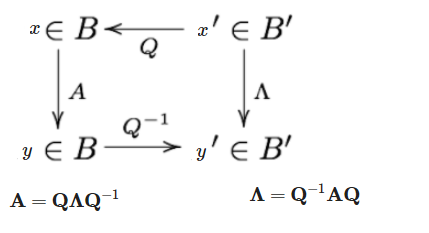

In [123]:
#transformacja
Q = np.array([2, -1, 1,1]).reshape([2,2])
print("Q:")
print(Q)

A = np.array([3, 1, 2,2]).reshape([2,2])
print("A:")
print(A)

x=[3,2]
print("x=")
print(x)

y=A@x
print("y=A@x")
print(y)

Lambda = np.linalg.inv(Q)@A@Q
print("Lambda: transformacja A w języku nowej bazy")
print(Lambda)

print("Sprawdzenie")

x_prim = changeBase(x,Q)

print("y_prim: - zmiana bazy y")
y_prim = Lambda@x_prim
print(y_prim)
print("y_prim: - zastosowanie transforamcji Lambda")
y_prim = changeBase(y, Q )
print(y_prim)

print("A z przekształcenia Lambda")
A = Q@Lambda@np.linalg.inv(Q)
print(A)


Q:
[[ 2 -1]
 [ 1  1]]
A:
[[3 1]
 [2 2]]
x=
[3, 2]
y=A@x
[11 10]
Lambda: transformacja A w języku nowej bazy
[[ 4.33 -0.67]
 [ 1.67  0.67]]
Sprawdzenie
y_prim: - zmiana bazy y
[7. 3.]
y_prim: - zastosowanie transforamcji Lambda
[7. 3.]
A z przekształcenia Lambda
[[3. 1.]
 [2. 2.]]


Dla szczególnego przypadku, gdy nowa baza jest macierzą wektorów własnych transformacji A, reprezentacja tej transformacji w nowej przestrzeni to rozciąganie zgodnie wartościami własnymi $\Lambda$



In [124]:



s,v = np.linalg.eig(A)
print("Wektory własne transformacji A, przyjmiemy je jako nową bazę")
print(v)

Q = v
print("A:")
print(A)

x=[3,2]
print("x=")
print(x)

y=A@x
print("y=A@x")
print(y)

Lambda = np.linalg.inv(Q)@A@Q
print("Lambda: transformacja A w języku nowej bazy")
print(Lambda)

print("Sprawdzenie")

x_prim = changeBase(x,Q)

print("y_prim: - zmiana bazy y")
y_prim = Lambda@x_prim
print(y_prim)
print("y_prim: - zastosowanie transforamcji Lambda")
y_prim = changeBase(y, Q )
print(y_prim)

print("A z przekształcenia Lambda")
A = Q@Lambda@np.linalg.inv(Q)
print(A)


Wektory własne transformacji A, przyjmiemy je jako nową bazę
[[ 0.71 -0.45]
 [ 0.71  0.89]]
A:
[[3. 1.]
 [2. 2.]]
x=
[3, 2]
y=A@x
[11. 10.]
Lambda: transformacja A w języku nowej bazy
[[ 4. -0.]
 [ 0.  1.]]
Sprawdzenie
y_prim: - zmiana bazy y
[15.08 -0.75]
y_prim: - zastosowanie transforamcji Lambda
[15.08 -0.75]
A z przekształcenia Lambda
[[3. 1.]
 [2. 2.]]


Input vector [-1  3]
Linear transformation with matrix A
[[1 1]
 [3 2]]
*********
New base:
[[ 1 -2]
 [-3 -3]]
*********
bx [-1.  0.]
bAx [-0. -1.]


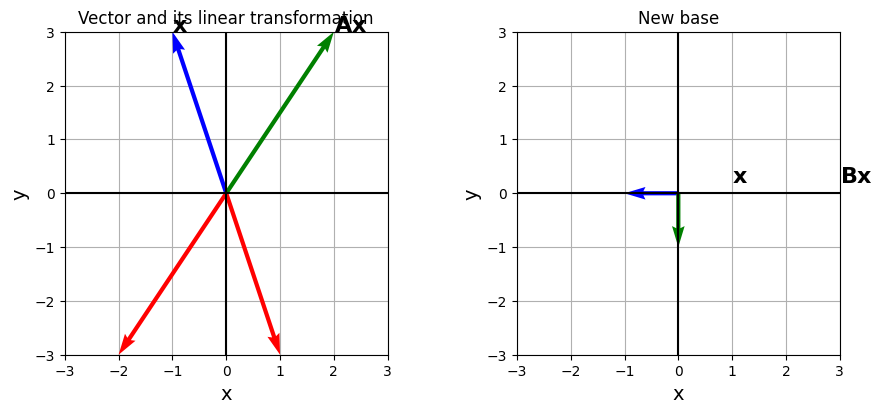

In [125]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline


x=np.array([-1,3]) # Original vector
print("Input vector", x )

theta = 30 * mt.pi / 180 # 30 degress in radian
A = np.array([[1, 1],[3, 2]]) # Rotation matrix for theta=30 degrees
print("Linear transformation with matrix A")
print(A)
print('*********')

bn = np.array([[1,-2],[-3,-3]]) #vectors of new base
#lam, bn = np.linalg.eig(A) #vectors of new base
print("New base:")
print(bn)
print('*********')


Ax = A @ x  # y1 is the rotated vector


# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors


bx=changeBase(x,bn)
print("bx", bx)

bAx=changeBase(Ax,bn)
print("bAx", bAx)

t2 = np.concatenate([bx.reshape(1,2), bAx.reshape(1,2)])



origin = [0,0],[0,0]  # origin point

org = np.zeros([2,1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:,0], t1[:,1] ,  color=['b','g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, bn[0,:], bn[1,:] ,  color=['r','r'], width=0.013, angles='xy', scale_units='xy', scale=1)


ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
up = max(np.max(Ax),  np.max(x), np.max(bn), np.max(bx), np.max(bAx))
low = min(np.min(Ax),  np.min(x), np.min(bn), np.min(bx), np.min(bAx),  0)

low =mt.floor(low)
up= mt.ceil(up)

ax1.set_xlim([low,up])
ax1.set_ylim([low,up])

ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Vector and its linear transformation")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(*x, "$\mathbf{x}$", fontsize=16 )
ax1.text(*Ax, "$\mathbf{Ax}$", fontsize=16 )

# Plotting the same vectors in new base


ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([low,up])
ax2.set_ylim([low,up])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New base")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()
plt.show()


Niech będzie zadana macierz B1, której kolumny będa reprezentacją "nowej" bazy  względem starej bazy. Poniżej reprezentacja przekształceń dla dowolnej bazy B1 zdefiniowanej w pierwszym wierszu kodu.

# Diagonalizacja macierzy


Let’s assume a matrix A has two eigenvalues and eigenvectors.

$A \upsilon_1 = \lambda_1 \upsilon_1$

$A \upsilon_2 = \lambda_2 \upsilon_2$


We can concatenate them together and rewrite the equations in the matrix form.


   $A \begin{bmatrix}
       \upsilon_1 & \upsilon_2
   \end{bmatrix} $
   =
   $   \begin{bmatrix}
      \lambda_1 \upsilon_1 & \lambda_1 \upsilon_2
   \end{bmatrix} $
   =
 $  \begin{bmatrix}
       \upsilon_1 &  \upsilon_2
   \end{bmatrix} $
̇
$  \begin{bmatrix}
       \lambda_1 & 0 \\ 0 & \lambda_2
   \end{bmatrix} $



We can generalize it into any number of eigenvectors as

$AV=V\Lambda$

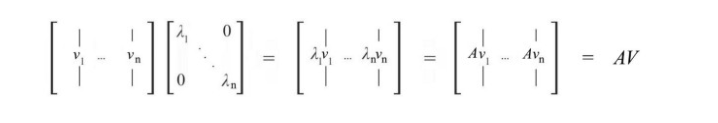



Załóżmy, że macierz A posiada dwie wartości własne oraz dwa wektory własne:

$A \upsilon_1 = \lambda_1 \upsilon_1$

$A \upsilon_2 = \lambda_2 \upsilon_2$


Możemy zapisać w postaci macierzowej:


   $A \begin{bmatrix}
       \upsilon_1 & \upsilon_2
   \end{bmatrix} $
   =
   $   \begin{bmatrix}
      \lambda_1 \upsilon_1 & \lambda_1 \upsilon_2
   \end{bmatrix} $
   =
 $  \begin{bmatrix}
       \upsilon_1 &  \upsilon_2
   \end{bmatrix} $
̇
$  \begin{bmatrix}
       \lambda_1 & 0 \\ 0 & \lambda_2
   \end{bmatrix} $



Możemy to uogolnić:

$AV=V\Lambda$

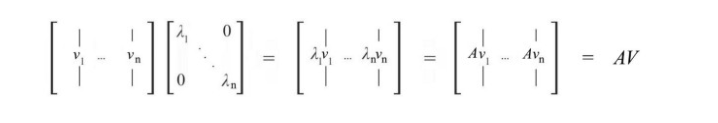


Macierz jest diagonalizowalna jeżeli:

$V^{-1} A V = \Lambda$

Macierz kwadratowa jest diagonalizowalna jeżeli posiada n niezależnych liniowo wektorów własnych. Jeżeli macierz jest symetryczna, jest diagonalizowalna.Jeżeli macierz nie posiada zdublowanych wartości własnych, to zawsze generuje wystarczająco dużo niezależnych liniowo wektrów własnych aby zdiagonalizować macierz

$A = V \Lambda V^{-1}$


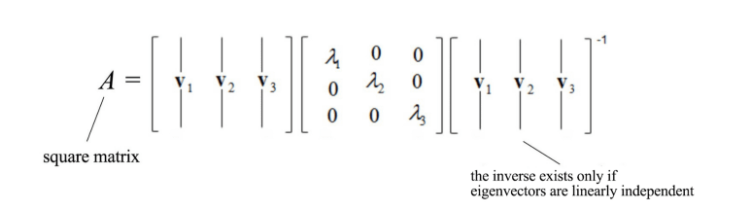

In [126]:

import numpy as np

#rozkład macierzy A (diagonalizacja z wykorzystaniem wartości własnych macierzy A)
A = np.array([[3, 5],
              [1, 2]])

print ("Macierz wejściowa A: ")
print(A)
lam, U = np.linalg.eig(A)
UInv = np.linalg.inv(U)
print ("******")

print("Eigenvectors:")
print(U)
print ("******")

lamd=np.diag(lam)
print("Eigenvalues:")
print(lamd)
print ("******")

print("Uinv")
print(UInv)
print ("******")
print("Rozkład A ")
print(U@lamd@UInv)

np.allclose(A,U@lamd@UInv) #Returns True if two arrays are element-wise equal within a tolerance.

Macierz wejściowa A: 
[[3 5]
 [1 2]]
******
Eigenvectors:
[[ 0.94 -0.87]
 [ 0.34  0.49]]
******
Eigenvalues:
[[4.79 0.  ]
 [0.   0.21]]
******
Uinv
[[ 0.65  1.16]
 [-0.45  1.25]]
******
Rozkład A 
[[3. 5.]
 [1. 2.]]


True

**Macierz symetryczna**
Macierz symetryczna jest diagonalizowalna, to jest może być przedstawiona w postaci:

$A = PDP^T$ ,
gdzie

$D$ jest  diagonalną macierzą  o wymiarach $n \times n$ złożoną z wartości własnych macierzy $A$

$P$ -  jest  macierzą $n \times n$, jej kolumnami są $n$ niezależnych liniowo wektorów własnych macierzy $A$.
 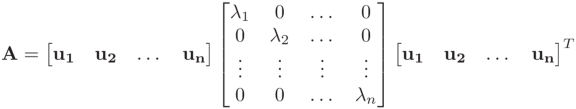

In [127]:

#rozkład symetrycznej macierzy A (diagonalizacja z wykorzystaniem wartości własnych macierzy A)
#jezeli macierz jest ortogonalna, wówczas macierz odwrotna jest macierzą transponowaną
#macierz symetryczna jest macierzą ortogonalną

A = np.array([[3, 1],
              [2, 1]])

print ("Macierz wejściowa A: ")
print(A)
lam, U = np.linalg.eig(A)
UInv = np.linalg.inv(U)
print ("******")


print("Eigenvectors (matrix U):")
print(U)
print ("******")

lamd=np.diag(lam)
print("Eigenvalues:")
print(lamd)
print ("******")

print("Uinv")
print(UInv)
print ("******")
print("Rozkład A ")
print(U@lamd@U.T)

Macierz wejściowa A: 
[[3 1]
 [2 1]]
******
Eigenvectors (matrix U):
[[ 0.81 -0.34]
 [ 0.59  0.94]]
******
Eigenvalues:
[[3.73 0.  ]
 [0.   0.27]]
******
Uinv
[[ 0.98  0.36]
 [-0.61  0.84]]
******
Rozkład A 
[[2.46 1.69]
 [1.69 1.54]]


Principal component analysis as a technique to reduce the dimension of a dataset.
From the demeaned data matrix, we form the covariance matrix

 $ C= \frac1N ~AA^T $

 ,
 where $N$  is the number of data points.

*  The eigenvectors $ u_1, u_2, \ldots u_m $ ,  of $ C$
 are called the principal components. We arrange them so that their corresponding eigenvalues are in decreasing order.

*  If $W_n$  is the subspace spanned by the first
 principal components, then the variance of the demeaned data projected onto $W_n$  is the sum of the first $n$  eigenvalues of C.
 No other  $n$-dimensional subspace retains more variance when the data is projected onto it.

*  If  $Q$  is the matrix whose columns are the first
 principal components, then the columns of $Q^TA$
 hold the coordinates, expressed in the basis  $ u_1, u_2, \ldots u_n $ ,  of the data once projected onto $W_n$.
* Our goal is to use a number of principal components that is large enough to retain most of the variance in the dataset but small enough to be manageable.

# Principal Component Analysis

PCA wykorzystuje wektory własne macierzy kowariancji do wyznaczenia bazy względem której wyznaczane są nowe współrzędne punktów.

W PCA szukamy "rzutów" punktów macierzy X na kierunki głównych składowych, którymi są wektory własne macierzy kowariancji.

Można udowodnić, że  wariancja rzutu na wektor odpowiadający maksymalnej wartości własnej jest największa spośród wszystkich rzutów.

Jak znaleźć współrzędne punktu w nowej bazie, zadanej wektorami własnymi?


$ 𝐕 $ - kolumnowy wektor wektorów własnych (każda kolumna tworzy wektor bazy)

$ 𝐗 $ - macierz punktów, obserwacja zapisane w wierszach, cechy - w kolumnach, na wyjściu obserwacje są w wierszach:

$ 𝐗 \cdot 𝐕 $

(gdyby X było zapisane również kolumnowo, a na wyjściu miałby być wektor kolumnowy obserwacji) :
$ 𝐕^T \cdot 𝐗 $


## PCA - implementacji funkcji

In [128]:
import numpy as np
from sklearn.decomposition import PCA
from numpy.linalg  import inv
from sklearn import preprocessing
np.set_printoptions(precision=5, suppress=True)

# A - observations in row, as it is assumed in scikit

def pca_implemented(A, n_components=None):


  #centralize features - substract mean
  A_scaled = preprocessing.StandardScaler(with_std=False).fit_transform(A)
  print ("Macierz A scaled: (observations in rows")
  print (A_scaled)
  print ("*****************************")

  #observations in columns, variables in features.
  A_scaled_T = A_scaled.T


  #rowvarbool, optional
  #If rowvar is True (default), then each row represents a variable, with observations in the columns.
  # Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.
  #bias=True   use n instead of (n-1)
  C = np.cov(A_scaled_T, rowvar = True, bias=True) #observations in rows, features in columns.
  print ("Macierz kowariancji")
  # which is equivalent to  (observation in rows!)
  print (C)
  print("# which is equivalent to  (observation in rows!)")
  print(np.dot(A_scaled.T, A_scaled)/A_scaled.shape[0])
  print ("*****************************")



  e, v = np.linalg.eigh(C)
  print ("Eigenvalues - mogą nie być poukładane malejąco!")
  print(e)
  print("Eigenvectors")
  print(v)
  print ("Sprawdzenie poprawności rozkładu:  V @ E @ V.T  powinno dać macierz kowariancji")
  print(np.dot(np.dot(v,np.diag(e)),v.T))

  # lets  sort eigenvalues
  sort_order = np.argsort(e)[::-1]
  print(sort_order)

  print("*************** Rearranged descending **************")
  e=e[sort_order]

  print ("Eigenvalues = variance along new base vectors!")
  print(e)
  v=v[:,sort_order ]

  #column vectors for transformation
  print ("Eigenvectors = new base")
  print(v)
  print ("*****************************")

  print ("********PCA trasformation ********")
  print ("Check: inv(v) @ A_scaled_T - scaled input matrix in  new basis")
  print("inv(v)")
  print(inv(v))
  print("Transformed columnm vector:")
  A_scaled_T_new_basis =(np.linalg.inv(v)@A_scaled_T)
  print(A_scaled_T_new_basis)

  #back to observations in row:
  print("Back to observations in row:")
  print(A_scaled_T_new_basis.T)

  print("compared to scikit.PCA(), sign in columns might be reverted")
  pca = PCA(n_components = n_components)
  pca_output = pca.fit_transform(A_scaled)
  print(pca_output)

  print ("Sign ambiguity in eigenvectors")
  print ("Principal components from PCA: (n_components, n_features)")
  print(pca.components_)
  print ("should be transposed to compare with eigenvectors to : (n_features, n_components)")
  print(pca.components_.T)
  print(v)

  print ("*************singular values from scikit  ****************")
  print(pca.singular_values_)




In [129]:
X = np.array([[1, -1], [-2, 2], [-3, -2], [0, 1], [2, 1], [3, 4]])
print(X)

[[ 1 -1]
 [-2  2]
 [-3 -2]
 [ 0  1]
 [ 2  1]
 [ 3  4]]


In [130]:
pca_implemented(X)

Macierz A scaled: (observations in rows
[[ 0.83333 -1.83333]
 [-2.16667  1.16667]
 [-3.16667 -2.83333]
 [-0.16667  0.16667]
 [ 1.83333  0.16667]
 [ 2.83333  3.16667]]
*****************************
Macierz kowariancji
[[4.47222 2.36111]
 [2.36111 3.80556]]
# which is equivalent to  (observation in rows!)
[[4.47222 2.36111]
 [2.36111 3.80556]]
*****************************
Eigenvalues - mogą nie być poukładane malejąco!
[1.75436 6.52341]
Eigenvectors
[[ 0.65582 -0.75491]
 [-0.75491 -0.65582]]
Sprawdzenie poprawności rozkładu:  V @ E @ V.T  powinno dać macierz kowariancji
[[4.47222 2.36111]
 [2.36111 3.80556]]
[1 0]
*************** Rearranged descending **************
Eigenvalues = variance along new base vectors!
[6.52341 1.75436]
Eigenvectors = new base
[[-0.75491  0.65582]
 [-0.65582 -0.75491]]
*****************************
********PCA trasformation ********
Check: inv(v) @ A_scaled_T - scaled input matrix in  new basis
inv(v)
[[-0.75491 -0.65582]
 [ 0.65582 -0.75491]]
Transformed colu

In [131]:
A = np.array([2,4,3,2,4,7,5,10,8,3,4,5,3,3,6]).reshape((5,3))
print ("Macierz A:")
print (A)
pca_implemented(A)

Macierz A:
[[ 2  4  3]
 [ 2  4  7]
 [ 5 10  8]
 [ 3  4  5]
 [ 3  3  6]]
Macierz A scaled: (observations in rows
[[-1.  -1.  -2.8]
 [-1.  -1.   1.2]
 [ 2.   5.   2.2]
 [ 0.  -1.  -0.8]
 [ 0.  -2.   0.2]]
*****************************
Macierz kowariancji
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
# which is equivalent to  (observation in rows!)
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
*****************************
Eigenvalues - mogą nie być poukładane malejąco!
[0.24299 1.56669 8.75032]
Eigenvectors
[[ 0.94086  0.05199  0.33477]
 [-0.32098  0.45295  0.83175]
 [-0.10839 -0.89002  0.44286]]
Sprawdzenie poprawności rozkładu:  V @ E @ V.T  powinno dać macierz kowariancji
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
[2 1 0]
*************** Rearranged descending **************
Eigenvalues = variance along new base vectors!
[8.75032 1.56669 0.24299]
Eigenvectors = new base
[[ 0.33477  0.05199  0.94086]
 [ 0.83175  0.45295 -0.32098]
 [ 0.44286 -0.89002 -0.1083

## Iris - przykład

In [132]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [133]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'pc3', 'pc4'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [135]:

print(x.shape)
print("pca.components_")
print(pca.components_)
print("pca.explained_variance_")
print(pca.explained_variance_)
print("pca.singular_values_")
print(pca.singular_values_)
print(principalComponents[:5,:])

(150, 4)
pca.components_
[[ 0.52237 -0.26335  0.58125  0.56561]
 [ 0.37232  0.92556  0.02109  0.06542]
 [ 0.72102 -0.24203 -0.14089 -0.6338 ]
 [-0.262    0.12413  0.80115 -0.52355]]
pca.explained_variance_
[2.93035 0.9274  0.14834 0.02075]
pca.singular_values_
[20.89552 11.75513  4.70138  1.75817]
[[-2.26454  0.5057   0.12194 -0.02307]
 [-2.08643 -0.6554   0.22725 -0.10321]
 [-2.36795 -0.31848 -0.05148 -0.02783]
 [-2.3042  -0.57537 -0.09886  0.06631]
 [-2.38878  0.67477 -0.02143  0.0374 ]]


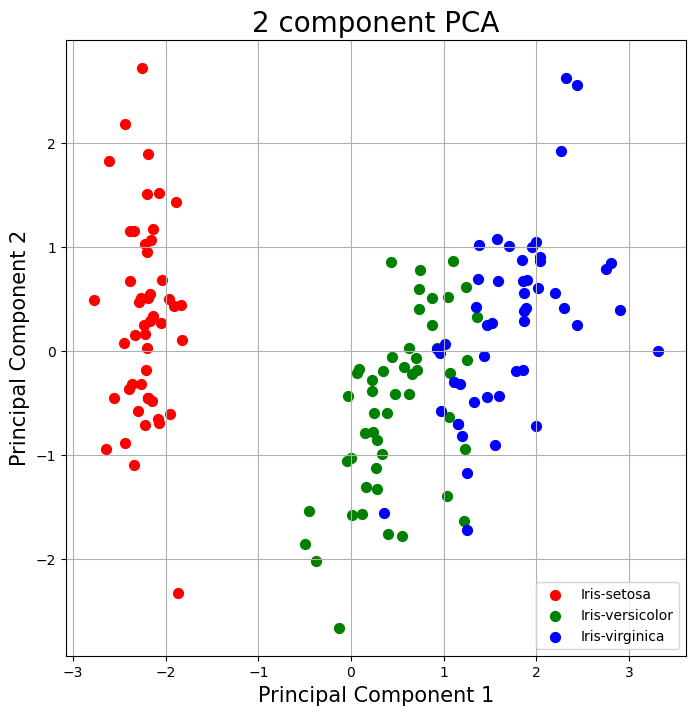

In [136]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Singular  Value Decomposition

## SVD as projection

Dekompozycja wektora:
* directions of projections - the **unit** vectors v1, v2
* the lengths of projection


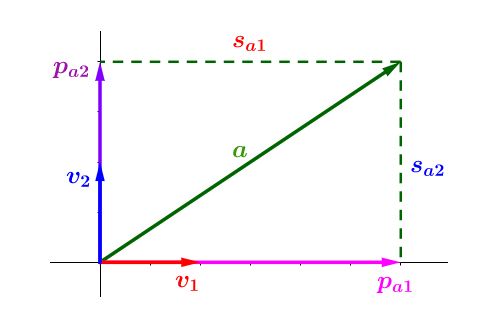


Rzut wektora na  wektory (kombinacja liniowa tych wektorów)

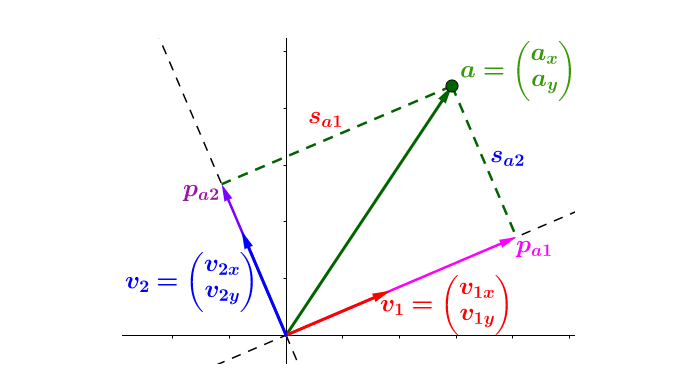

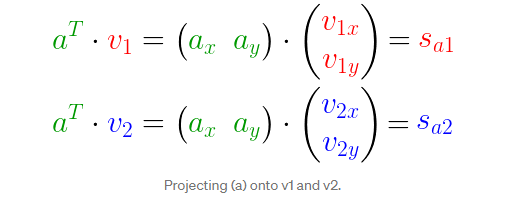

Any vector can be expressed in terms of
* projection direction unit vectors (v1, v2, ...)
* The length of projection onto them (sa1, sa2, ...)

Reprezentacja wierszowa wektorów w macierzy A (oryginalnie były kolumnowe):


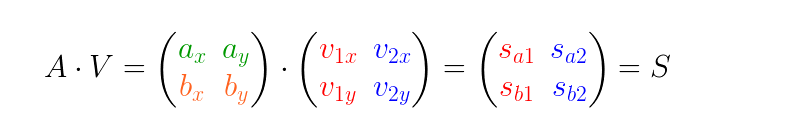

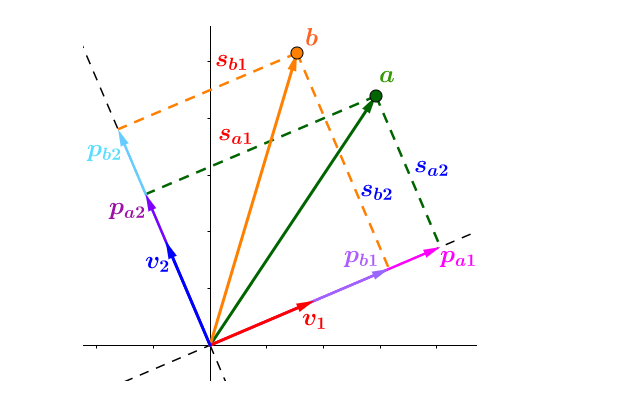

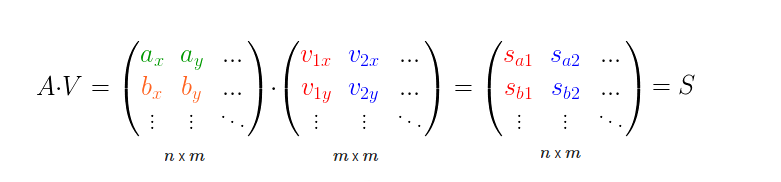


$A · V =U \cdot S$

* A - matrix of points
* The dot product performs the projection
* V - matrix of decomposition axes
* S - matris of lengths of projection

Macierz S możemy zdekomponować w ten sposób, aby wektory kolumnowe miały długość 1.


$𝐒=𝐔 \cdot 𝚺$

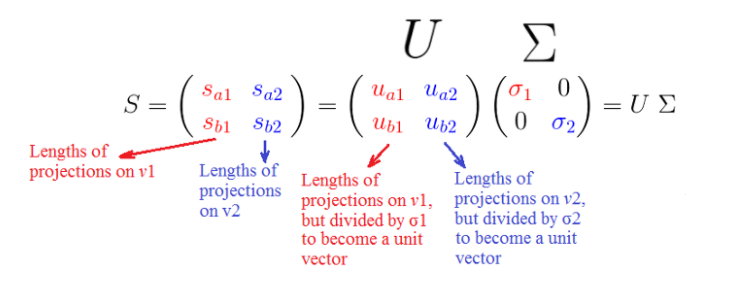

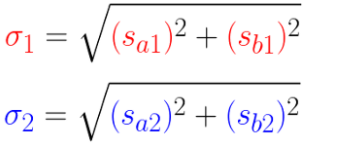

Interpretacja

wielkość sigma  jest sumą projekcji poszczególnych obserwacji na kierunek ( pierwiastkiem z sumy kwadratów)
Im większa wartość sigma, oznacza to większą wartość projekcji, a zatem punkty leżą bliżej wyznaczonej osi.

Algorytm SVD nie przypisuje  kierunków projekcji (kolumn macierzy V) losowo.

W algorytmie SVD wybieramy je tak, aby były głównymi składowymi macierzy A.

Columns of V are principle components of X


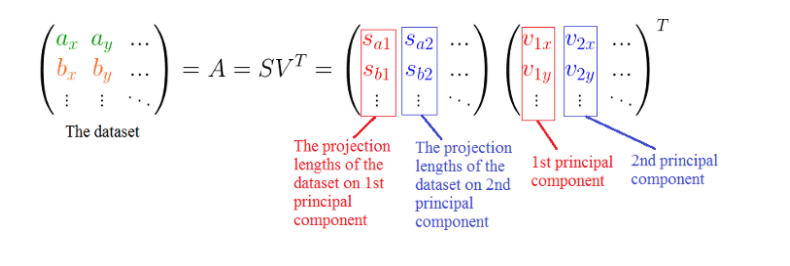

\begin{aligned} X&=\sqrt{\lambda_1}P_1\tilde{\epsilon_1}+\sqrt{\lambda_2}P_2\tilde{\epsilon_2}+\ldots+\sqrt{\lambda_m}P_m\tilde{\epsilon_m}\ &=\sigma_1P_1\tilde{\epsilon_2}+\sigma_2P_2\tilde{\epsilon_2}+\ldots+\sigma_mP_m\tilde{\epsilon_m} \end{aligned}

In [137]:
A = np.array([2,4,3,2,4,7,5,10,8,3,4,5,3,3,6]).reshape((5,3))
print ("Macierz A:")
print (A)
pca_implemented(A)

Macierz A:
[[ 2  4  3]
 [ 2  4  7]
 [ 5 10  8]
 [ 3  4  5]
 [ 3  3  6]]
Macierz A scaled: (observations in rows
[[-1.  -1.  -2.8]
 [-1.  -1.   1.2]
 [ 2.   5.   2.2]
 [ 0.  -1.  -0.8]
 [ 0.  -2.   0.2]]
*****************************
Macierz kowariancji
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
# which is equivalent to  (observation in rows!)
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
*****************************
Eigenvalues - mogą nie być poukładane malejąco!
[0.24299 1.56669 8.75032]
Eigenvectors
[[ 0.94086  0.05199  0.33477]
 [-0.32098  0.45295  0.83175]
 [-0.10839 -0.89002  0.44286]]
Sprawdzenie poprawności rozkładu:  V @ E @ V.T  powinno dać macierz kowariancji
[[1.2  2.4  1.2 ]
 [2.4  6.4  2.6 ]
 [1.2  2.6  2.96]]
[2 1 0]
*************** Rearranged descending **************
Eigenvalues = variance along new base vectors!
[8.75032 1.56669 0.24299]
Eigenvectors = new base
[[ 0.33477  0.05199  0.94086]
 [ 0.83175  0.45295 -0.32098]
 [ 0.44286 -0.89002 -0.1083

## SVD


Singular Value Decomposition of $n$ x $m$ matrix $A$:

&nbsp;


$A=USV^T$

&nbsp;


$A_{n,m}=U_{n,n}S_{n,m}V_{m,m}^T$

&nbsp;



*  $\mathbf{U} = (\mathbf{u}_1, \mathbf{u}_2, \cdots , \mathbf{u}_n)$ hanger, orthogonal matrix  $n$ x $m$ (form an orthonormal basis for the space spanned by the column vectors of $A$)

  * The columns of $\mathbf{U}$  (i.e.$\mathbf{u}_j, j = 1, \cdots , n)$ , are the eigenvectors of $\mathbf{A}\mathbf{A}^T$.

*  $S$
stretcher, rectangular matrix with nonzero elelements along the first $m$ x $m$ submatrix diagonal  
  * $diag(\mathbf{s}_1, \mathbf{s}_2, \cdots , \mathbf{s}_m)$ $\mathbf{s}_1 \geq \mathbf{s}_2 \geq \cdots \geq \mathbf{s}_m \geq 0$ are the singular values of $A$ with $n > m$



*  $\mathbf{V} = (\mathbf{v}_1, \mathbf{v}_2, \cdots , \mathbf{v}_m)$ aligner, orthogonal matrix  $m$ x $m$ (form an orthonormal basis for the space spanned by the row vectors of $A$)

  * The columns of $V$  (i.e.$\mathbf{v}_j, j = 1, \cdots , m)$ , are the eigenvectors of $\mathbf{A}^T\mathbf{A}$. They are called principal component direction of $A$)

  * The diagonal values in  $S$  (i.e.$\mathbf{s}_1, \mathbf{s}_2, \cdots , \mathbf{s}_m)$ , are the square roots of the eigenvalues of $\mathbf{A}^T\mathbf{A}$.
  





$A_{n,m}V_{m,m}=U_{n,n}S_{n,m}$



Rozkładem macierzy A  na wartości szczególne nazywamy rozkład postaci:

$A=USV^T$

$A$ -macierz  $n$ x $m$

$U$ -macierz ortogonalna  $n$ x $m$ (hanger - macierz kolumnami ortonormalna, przekształca bazę standardową na bazę wyjściową)

$S$ -macierz diagonalna  $n$ x $m$ (stretcher, działa "rozciągająco" wzdłuż osi współrzędnych)

$V$ -macierz ortogonalna  $m$ x $m$ (aligner - macierz wierszami ortonormalna, przekształca wektory pewnej bazy na bazę standardową (zero-jedynkową, służy do zamiany współrzędnych standardowych na współrzędne względem innej bazy))


$A_{n,m}=U_{n,n}S_{n,m}V_{m,m}^T$




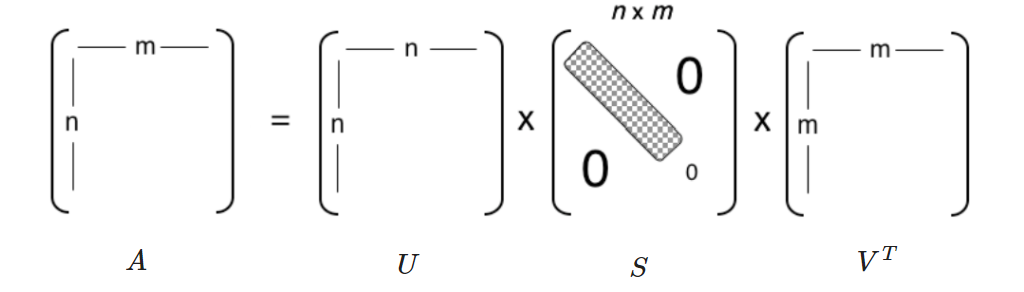

Inne formy przedstawienia iloczynu:
$A = USV^T$

$AV =US$

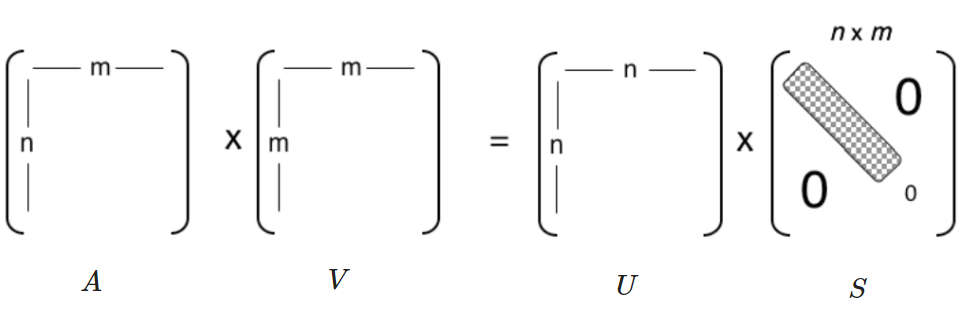

Inne formy przedstawienia iloczynu:
$A = USV^T$

$AV =US$

$A^T =VSU^T$


Wyliczenie macierzy U oraz V  z wykorzystaniem wartości własnych;  

$AA^TU=US^2$

$A^TAV = VS^2$

Wartości własne macierzy i wektory:


$U^TU = VV^T = I$

Wyliczenie macierzy U oraz V  z wykorzystaniem wartości własnych;  


Kolumny macierzy U  są ortonormalnymi wektorami własnymi macierzy $AA^T$,

kolumny macierzy V są ortonormalnymi wektorami własnymi macierzy $A^TA$

S - macierz diagonalna zawierająca pierwiastki kwadratowe wartości własnych $U$ lub $V$ uporządkowane malejąco.


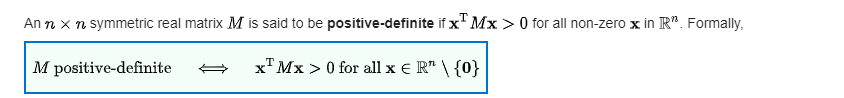

$A$  -  document-term matrix (DTM)

$A^T$ - term-document-matrix (TDM)

$A^TA  \space ([m \times m]$) - *term-to-term similarity matrix*


$AA^T  \space ([n \times n]$) - *document -to-document similarity matrix*


Matrices:
- square
- symmetrical
- positive definite -
- the same eigenvalues
- rank $r$

Square roots of eigenvalues are called **singular values**


$A$  - macierz document-term matrix (DTM)

$A^T$ - macierz term-document-matrix (TDM)

$A^TA  \space ([m \times m]$) - macierz podobienstwa termów (*term-to-term similarity matrix*)


$AA^T  \space ([n \times n]$) - macierz podobienstwa dokumentów (*document -to-document similarity matrix*)


Macierze:
- symetryczne
- kwadratowe
- Określone pozytywnie (wartości własne nieujemne)
- Obydwie macierze mają te same wartości własne
- Obydwie macierze mają ten sam rząd $r$

Pierwiastki kwadratowe wartości własnych są nazywane wartościami osobliwymi **singular values**


$US$ - coordinates of points  with regard to "new basis"


$US$ - współrzędne punktów w odniesieniu do "nowego układu współrzędnych"

Założenie:  $m \ge n$

Przykład


In [138]:
  A = np.array([2,4,3,2,4,7,5,10,8,3,4,5,3,3,6]).reshape((5,3))
  print ("Macierz A: (document -term matrix, document in rows")
  print (A)

Macierz A: (document -term matrix, document in rows
[[ 2  4  3]
 [ 2  4  7]
 [ 5 10  8]
 [ 3  4  5]
 [ 3  3  6]]


In [139]:
# scipy matrix:
# dtm

def svd_implemented(A):
  #centralize features - substract mean

  print ("Input:")
  print (A)
  print ("*****************************")

  np.set_printoptions(precision=2, suppress=True)

  print("A scaled: ")
  print(A)


  #print("Input matrix: (column oriented) - tdm")
  #print(A_scaled_T)
  u,s,vh = np.linalg.svd(A)
  print("Macierz U")
  print(u)

  print("Macierz S - singular values")
  print(s)


  print("Macierz VT = principal components (n_components, n_features")
  print(vh)
  print("principal components in columns: ")
  print(vh.T)

  smat = np.zeros(A.shape)

  np.fill_diagonal(smat,s)
  print(smat)


  print("u @ smat" )
  uu = u @ smat
  print(uu)


  print("smat @ vh" )
  vv =  smat @ vh
  print(vv)



  # Sprawdzenie poprawnosci rozkladu
  print("Check ")
  print(u@smat@vh)

A_scaled = preprocessing.StandardScaler(with_std=False).fit_transform(A)
svd_implemented(A_scaled)

Input:
[[-1.  -1.  -2.8]
 [-1.  -1.   1.2]
 [ 2.   5.   2.2]
 [ 0.  -1.  -0.8]
 [ 0.  -2.   0.2]]
*****************************
A scaled: 
[[-1.  -1.  -2.8]
 [-1.  -1.   1.2]
 [ 2.   5.   2.2]
 [ 0.  -1.  -0.8]
 [ 0.  -2.   0.2]]
Macierz U
[[-0.36 -0.71 -0.29  0.    0.53]
 [-0.1   0.56 -0.68  0.34  0.32]
 [ 0.88 -0.15  0.03  0.17  0.42]
 [-0.18 -0.09  0.37  0.91 -0.05]
 [-0.24  0.39  0.56 -0.2   0.66]]
Macierz S - singular values
[6.61 2.8  1.1 ]
Macierz VT = principal components (n_components, n_features
[[ 0.33  0.83  0.44]
 [-0.05 -0.45  0.89]
 [ 0.94 -0.32 -0.11]]
principal components in columns: 
[[ 0.33 -0.05  0.94]
 [ 0.83 -0.45 -0.32]
 [ 0.44  0.89 -0.11]]
[[6.61 0.   0.  ]
 [0.   2.8  0.  ]
 [0.   0.   1.1 ]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]
u @ smat
[[-2.41 -1.99 -0.32]
 [-0.64  1.57 -0.75]
 [ 5.8  -0.41  0.04]
 [-1.19 -0.26  0.41]
 [-1.57  1.08  0.62]]
smat @ vh
[[ 2.21  5.5   2.93]
 [-0.15 -1.27  2.49]
 [ 1.04 -0.35 -0.12]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
Check

In [140]:
A_scaled = preprocessing.StandardScaler(with_std=False).fit_transform(A)

svd_implemented(A_scaled.T)

Input:
[[-1.  -1.   2.   0.   0. ]
 [-1.  -1.   5.  -1.  -2. ]
 [-2.8  1.2  2.2 -0.8  0.2]]
*****************************
A scaled: 
[[-1.  -1.   2.   0.   0. ]
 [-1.  -1.   5.  -1.  -2. ]
 [-2.8  1.2  2.2 -0.8  0.2]]
Macierz U
[[-0.33  0.05  0.94]
 [-0.83  0.45 -0.32]
 [-0.44 -0.89 -0.11]]
Macierz S - singular values
[6.61 2.8  1.1 ]
Macierz VT = principal components (n_components, n_features
[[ 0.36  0.1  -0.88  0.18  0.24]
 [ 0.71 -0.56  0.15  0.09 -0.39]
 [-0.29 -0.68  0.03  0.37  0.56]
 [ 0.    0.34  0.17  0.91 -0.2 ]
 [ 0.53  0.32  0.42 -0.05  0.66]]
principal components in columns: 
[[ 0.36  0.71 -0.29  0.    0.53]
 [ 0.1  -0.56 -0.68  0.34  0.32]
 [-0.88  0.15  0.03  0.17  0.42]
 [ 0.18  0.09  0.37  0.91 -0.05]
 [ 0.24 -0.39  0.56 -0.2   0.66]]
[[6.61 0.   0.   0.   0.  ]
 [0.   2.8  0.   0.   0.  ]
 [0.   0.   1.1  0.   0.  ]]
u @ smat
[[-2.21  0.15  1.04  0.    0.  ]
 [-5.5   1.27 -0.35  0.    0.  ]
 [-2.93 -2.49 -0.12  0.    0.  ]]
smat @ vh
[[ 2.41  0.64 -5.8   1.19  1.57]


## Przykład z książki

Uwaga - wejsciem jest macierz TDM, anie DTM

In [141]:
import numpy as np
tdm=np.array([1,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,1]).reshape([9,4])

print(tdm)

[[1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 0 1]]


In [142]:
svd_implemented(tdm)

Input:
[[1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 0 1]]
*****************************
A scaled: 
[[1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [0 1 0 1]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 1 1]
 [0 0 1 1]
 [0 0 0 1]]
Macierz U
[[-0.36  0.12  0.09  0.65 -0.2  -0.44 -0.31 -0.31 -0.08]
 [-0.31 -0.06 -0.68  0.21  0.46  0.39 -0.13 -0.13 -0.05]
 [-0.27 -0.58 -0.04  0.36 -0.26  0.05  0.44  0.44  0.13]
 [-0.38 -0.16  0.56 -0.07  0.06  0.47 -0.1  -0.1  -0.51]
 [-0.15 -0.43  0.21 -0.18  0.66 -0.51 -0.04 -0.04  0.13]
 [-0.34 -0.34 -0.2  -0.51 -0.47 -0.02 -0.3  -0.3   0.25]
 [-0.43  0.36 -0.07 -0.22  0.   -0.18  0.72 -0.28 -0.1 ]
 [-0.43  0.36 -0.07 -0.22  0.   -0.18 -0.28  0.72 -0.1 ]
 [-0.23  0.27  0.35  0.11  0.13  0.33 -0.02 -0.02  0.78]]
Macierz S - singular values
[2.79 1.87 1.57 1.5 ]
Macierz VT = principal components (n_components, n_features
[[-0.34 -0.41 -0.54 -0.66]
 [-0.27 -0.81  0.17  0.5 ]
 [-0.41  0.34 -0.66  0.54]
 [ 0.81 -0.27 -0.5   0.17]]
principal

The first SVD dimension provides the best approximation of the original matrix that is possible representation in limited number of dimensions.

* The documents are represented in the SVD space by the column vector of the matrix  $𝑽^T$

* The terms are represented in the SVD space by the row vectors of the multiplication of matrix $𝐔$ nad matrix $𝐒$

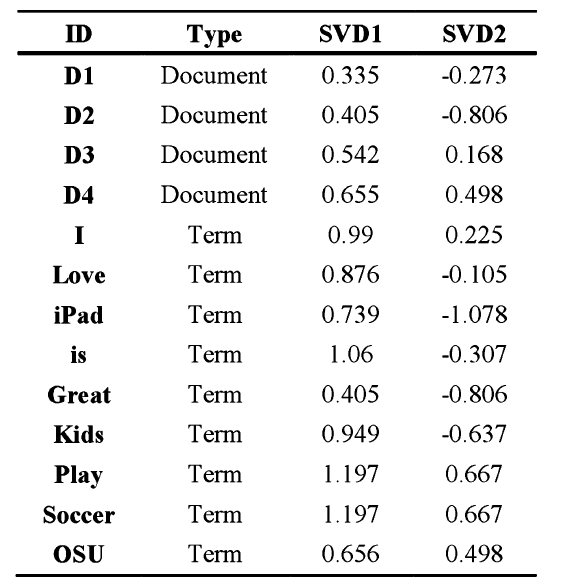

Nie zgadzają się znaki (w porównaniu z tym, co jest w książce). Zastosujmy  inną metodę:

In [143]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2)
tdm_tranformed = svd.fit_transform(tdm)

#przypisanie termów do topic ( z dokładnością do znaku!)
print(tdm_tranformed)

[[ 0.99 -0.23]
 [ 0.88  0.1 ]
 [ 0.74  1.08]
 [ 1.06  0.31]
 [ 0.41  0.81]
 [ 0.95  0.64]
 [ 1.2  -0.67]
 [ 1.2  -0.67]
 [ 0.66 -0.5 ]]


In [144]:
 print(svd.singular_values_)
 print(svd.components_)

[2.79 1.87]
[[ 0.34  0.41  0.54  0.66]
 [ 0.27  0.81 -0.17 -0.5 ]]


A gdyby tak macierz skonwertować do klasycznej postaci

## Przykład z książki (2)

In [145]:
dtm=tdm.T

np.set_printoptions(precision=2, suppress=True)

dtm = np.array([1,1,1,0,0,2,2,2,0,0,1,1,1,0,0,5,5,5,0,0,0,0,0,2,2,0,0,0,3,3,0,0,0,1,1]).reshape([7,5])
print("dtm")
print(dtm)
print("*****************")

U,S,V = np.linalg.svd(dtm)
print("U")
print(U)
print("*****************")
print("S")
print(S)
print("*****************")

print("V")
print(V)
print("*****************")


dtm
[[1 1 1 0 0]
 [2 2 2 0 0]
 [1 1 1 0 0]
 [5 5 5 0 0]
 [0 0 0 2 2]
 [0 0 0 3 3]
 [0 0 0 1 1]]
*****************
U
[[-0.18  0.    0.97 -0.07 -0.05 -0.11 -0.04]
 [-0.36  0.    0.06  0.49 -0.14  0.74  0.25]
 [-0.18  0.    0.03  0.04  0.98  0.06  0.02]
 [-0.9   0.   -0.22 -0.19 -0.13 -0.29 -0.1 ]
 [ 0.   -0.53  0.    0.71  0.   -0.43 -0.14]
 [ 0.   -0.8   0.   -0.43  0.    0.36 -0.21]
 [ 0.   -0.27  0.   -0.14  0.   -0.21  0.93]]
*****************
S
[9.64 5.29 0.   0.   0.  ]
*****************
V
[[-0.58 -0.58 -0.58 -0.   -0.  ]
 [-0.   -0.   -0.   -0.71 -0.71]
 [ 0.82 -0.41 -0.41  0.    0.  ]
 [ 0.    0.    0.   -0.71  0.71]
 [ 0.   -0.71  0.71  0.    0.  ]]
*****************


In [146]:
import numpy as np
from sklearn.decomposition import TruncatedSVD


svd = TruncatedSVD(n_components = 2)
dtm_tranformed = svd.fit_transform(dtm)  #  przemnozone przez siebie macierze U @ S
print(dtm_tranformed)
print("**********")

print("svd.components_")
print(svd.components_)                  # macierz V
print("**********")

print("svd.singular_values_")
print(svd.singular_values_)             #singular values
print("**********")

n = len(svd.singular_values_)
smat = np.zeros([n,n])
np.fill_diagonal(smat,svd.singular_values_)

print("U")
print(dtm_tranformed@np.linalg.inv(smat))     #macierz U możemy uzyskać mnożąc przez odwrotność S
print("**********")


[[ 1.73  0.  ]
 [ 3.46  0.  ]
 [ 1.73  0.  ]
 [ 8.66  0.  ]
 [-0.    2.83]
 [-0.    4.24]
 [-0.    1.41]]
**********
svd.components_
[[ 0.58  0.58  0.58 -0.   -0.  ]
 [ 0.    0.    0.    0.71  0.71]]
**********
svd.singular_values_
[9.64 5.29]
**********
U
[[ 0.18  0.  ]
 [ 0.36  0.  ]
 [ 0.18  0.  ]
 [ 0.9   0.  ]
 [-0.    0.53]
 [-0.    0.8 ]
 [-0.    0.27]]
**********


In [147]:
smat

array([[9.64, 0.  ],
       [0.  , 5.29]])

In [148]:
U[:,:2]@smat


array([[-1.73,  0.  ],
       [-3.46,  0.  ],
       [-1.73,  0.  ],
       [-8.66,  0.  ],
       [ 0.  , -2.83],
       [ 0.  , -4.24],
       [ 0.  , -1.41]])

In [149]:
U[:,:2]

array([[-0.18,  0.  ],
       [-0.36,  0.  ],
       [-0.18,  0.  ],
       [-0.9 ,  0.  ],
       [ 0.  , -0.53],
       [ 0.  , -0.8 ],
       [ 0.  , -0.27]])

In [150]:
import numpy as np
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 2)
dtm_tranformed = svd.fit_transform(dtm)
print(dtm_tranformed)

[[ 1.73  0.  ]
 [ 3.46  0.  ]
 [ 1.73  0.  ]
 [ 8.66  0.  ]
 [-0.    2.83]
 [-0.    4.24]
 [-0.    1.41]]


In [151]:
print(svd.explained_variance_ratio_)

[0.77 0.23]


In [152]:
 print(svd.singular_values_)
 print(svd.components_)


[9.64 5.29]
[[ 0.58  0.58  0.58 -0.   -0.  ]
 [-0.    0.    0.    0.71  0.71]]


# Iris dataset example

In [153]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn import datasets
from scipy.linalg import sqrtm, inv

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.set_printoptions(precision=2, suppress=True)
iris = datasets.load_iris()

X = iris.data
print(X.shape)

C  = np.cov(X.T, rowvar=True)
print("Covariance matrix")
print(C)

print("Center data, covariance is the same")
scaler=StandardScaler(with_std = False)
X_centered = scaler.fit_transform(X)




lam, u = LA.eig(C)
print("Covariance matrix eigenvalues:")
print(lam)

print("Covariance matrix eigenvectors -> vectors of new base")

print(u)

print("Matrix eigenvectors inverse -> equals transposition")
print("Formula to transpose all points to new base ")

transform_matrix = inv(u)
print(inv(u))

print("Point in a space formed by a new basis (observations in columns) ")
new_X = transform_matrix@X_centered.T
print(new_X.shape)
print(new_X[:,0:3])




(150, 4)
Covariance matrix
[[ 0.69 -0.04  1.27  0.52]
 [-0.04  0.19 -0.33 -0.12]
 [ 1.27 -0.33  3.12  1.3 ]
 [ 0.52 -0.12  1.3   0.58]]
Center data, covariance is the same
Covariance matrix eigenvalues:
[4.23 0.24 0.08 0.02]
Covariance matrix eigenvectors -> vectors of new base
[[ 0.36 -0.66 -0.58  0.32]
 [-0.08 -0.73  0.6  -0.32]
 [ 0.86  0.17  0.08 -0.48]
 [ 0.36  0.08  0.55  0.75]]
Matrix eigenvectors inverse -> equals transposition
Formula to transpose all points to new base 
[[ 0.36 -0.08  0.86  0.36]
 [-0.66 -0.73  0.17  0.08]
 [-0.58  0.6   0.08  0.55]
 [ 0.32 -0.32 -0.48  0.75]]
Point in a space formed by a new basis (observations in columns) 
(4, 150)
[[-2.68 -2.71 -2.89]
 [-0.32  0.18  0.14]
 [-0.03 -0.21  0.02]
 [ 0.    0.1   0.02]]


## PCA on Iris


In [154]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from  sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.set_printoptions(precision=2, suppress=True)
iris = datasets.load_iris()

X = iris.data
print(X.shape)

## PCA Attention! works on observations in rows.
print("First records of X  (observations in rows): ")
print(X[:5,:])
print("Stdandard deviations of variables: ")
print(np.std(X, axis=0))
print("Mean of variables: ")
print(np.mean(X, axis=0))

scaler=StandardScaler(with_std = False)

X_centered = scaler.fit_transform(X)
print("First records of X : ")
print(X_centered[:5,:])

print("Stadndard deviations of variables (should remain unchanged): ")
print(np.std(X_centered, axis=0))


print("Mean of variables (should be equal to 0): ")
print(np.mean(X_centered, axis=0))

print("************************: ")


pca = PCA(n_components=4)
X_r = pca.fit_transform(X_centered)

print("PCA components:")
print(pca.components_)

print("This is actually the same as from previous (mind the sign ambiguity).PCA components should be written in   columns, so we have to transpose PCA to compare")
print(pca.components_.T)

print("previus matrix")

print(u)

print("************************: ")

print("PCA new points:")
print(X_r.shape)
print(X_r[:3, :].T)

print("Lets compare to previuos (sign ambiguity):")
print(new_X[:,0:3])

(150, 4)
First records of X  (observations in rows): 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Stdandard deviations of variables: 
[0.83 0.43 1.76 0.76]
Mean of variables: 
[5.84 3.06 3.76 1.2 ]
First records of X : 
[[-0.74  0.44 -2.36 -1.  ]
 [-0.94 -0.06 -2.36 -1.  ]
 [-1.14  0.14 -2.46 -1.  ]
 [-1.24  0.04 -2.26 -1.  ]
 [-0.84  0.54 -2.36 -1.  ]]
Stadndard deviations of variables (should remain unchanged): 
[0.83 0.43 1.76 0.76]
Mean of variables (should be equal to 0): 
[-0. -0. -0. -0.]
************************: 
PCA components:
[[ 0.36 -0.08  0.86  0.36]
 [ 0.66  0.73 -0.17 -0.08]
 [-0.58  0.6   0.08  0.55]
 [ 0.32 -0.32 -0.48  0.75]]
This is actually the same as from previous (mind the sign ambiguity).PCA components should be written in   columns, so we have to transpose PCA to compare
[[ 0.36  0.66 -0.58  0.32]
 [-0.08  0.73  0.6  -0.32]
 [ 0.86 -0.17  0.08 -0.48]
 [ 0.36 -0.08  0.55  0.75]]
previus matrix
[[ 0.36 -0.66 -0

## SVD on Iris

In [155]:

def svd_implemented1(A):
  # input - centralize features - substract mean


  #print("Input matrix: (column oriented) - tdm")
  print(A[:3,:])
  u,s,vh = np.linalg.svd(A)
  print("Macierz U")


  print (u)
  print(u.shape)

  print("Macierz S - singular values")
  print(s.shape)


  print("Macierz VT = principal components (n_components, n_features")
  print(vh.shape)
  print("principal components in columns: ")
  print(vh)

  smat = np.zeros(A.shape)
  np.fill_diagonal(smat,s)



  print("u @ smat" )
  uu = u @ smat
  print(uu.shape)
  print("First three records in a new space ")
  print(uu[:3,:])

  print("smat @ vh" )
  vv =  smat @ vh
  print(vv.shape)



  # Sprawdzenie poprawnosci rozkladu
  print("Check (first three records) ")
  A_original  = u@smat@vh
  print(A_original[:3,:])

np.set_printoptions(precision=2, suppress=True)
iris = datasets.load_iris()

X = iris.data
target_names = iris.target_names

scaler=StandardScaler(with_std = False)
X_centered = scaler.fit_transform(X)


svd_implemented1(X_centered)

[[-0.74  0.44 -2.36 -1.  ]
 [-0.94 -0.06 -2.36 -1.  ]
 [-1.14  0.14 -2.46 -1.  ]]
Macierz U
[[-0.11 -0.05  0.01 ...  0.05  0.    0.  ]
 [-0.11  0.03  0.06 ...  0.01  0.08  0.01]
 [-0.12  0.02 -0.01 ...  0.03  0.18  0.15]
 ...
 [ 0.07 -0.01 -0.04 ...  0.99 -0.01 -0.  ]
 [ 0.08 -0.02 -0.21 ... -0.01  0.95 -0.02]
 [ 0.06  0.05 -0.11 ... -0.   -0.02  0.98]]
(150, 150)
Macierz S - singular values
(4,)
Macierz VT = principal components (n_components, n_features
(4, 4)
principal components in columns: 
[[ 0.36 -0.08  0.86  0.36]
 [-0.66 -0.73  0.17  0.08]
 [ 0.58 -0.6  -0.08 -0.55]
 [ 0.32 -0.32 -0.48  0.75]]
u @ smat
(150, 4)
First three records in a new space 
[[-2.68 -0.32  0.03  0.  ]
 [-2.71  0.18  0.21  0.1 ]
 [-2.89  0.14 -0.02  0.02]]
smat @ vh
(150, 4)
Check (first three records) 
[[-0.74  0.44 -2.36 -1.  ]
 [-0.94 -0.06 -2.36 -1.  ]
 [-1.14  0.14 -2.46 -1.  ]]


In [156]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
target_names = iris.target_names

scaler=StandardScaler(with_std = False)
X_centered = scaler.fit_transform(X)

svd = TruncatedSVD(n_components = 4)
X_tranformed = svd.fit_transform(X_centered)  #  multiplied  U @ S


print("svd.components_")
print(svd.components_)                  # macierz V

print("pca.components_")
print(pca.components_)
print("**********")

print("svd.singular_values_")
print(svd.singular_values_)             #singular values
print("**********")



n = len(svd.singular_values_)
smat = np.zeros([n,n])
np.fill_diagonal(smat,svd.singular_values_)


#print("U")
#print(X_tranformed@np.linalg.inv(smat))     #macierz U możemy uzyskać mnożąc przez odwrotność S
#print("**********")


# sample observations in a new space
print("First three observations from SVD")
print(X_tranformed[:3,:].T)

print("PCA new points (the same as from SVD):")
print(X_r[:3, :].T)



svd.components_
[[ 0.36 -0.08  0.86  0.36]
 [ 0.66  0.73 -0.17 -0.08]
 [-0.58  0.6   0.08  0.55]
 [ 0.32 -0.32 -0.48  0.75]]
pca.components_
[[ 0.36 -0.08  0.86  0.36]
 [ 0.66  0.73 -0.17 -0.08]
 [-0.58  0.6   0.08  0.55]
 [ 0.32 -0.32 -0.48  0.75]]
**********
svd.singular_values_
[25.1   6.01  3.41  1.88]
**********
First three observations from SVD
[[-2.68 -2.71 -2.89]
 [ 0.32 -0.18 -0.14]
 [-0.03 -0.21  0.02]
 [ 0.    0.1   0.02]]
PCA new points (the same as from SVD):
[[-2.68 -2.71 -2.89]
 [ 0.32 -0.18 -0.14]
 [-0.03 -0.21  0.02]
 [ 0.    0.1   0.02]]


explained variance ratio (first two components): [0.92 0.05]


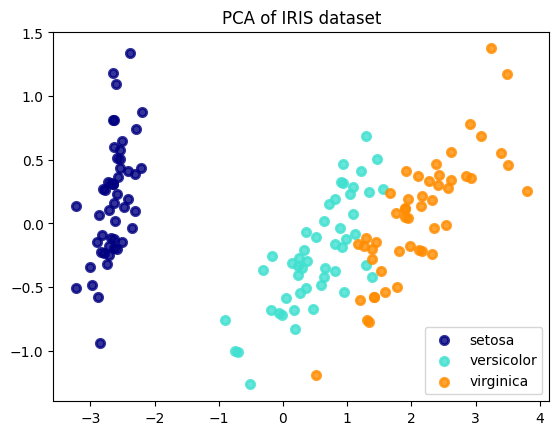

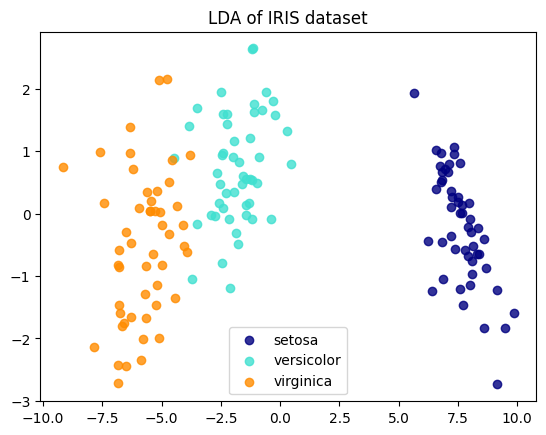

In [157]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()